# EXPLORATORY DATA ANALYSYS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/SKRIPSI/Data/'
import pandas as pd
data = pd.read_csv(dataset_path + 'Data EMO Final.csv')
data

Labelling Data Menjadi 6 Emosi Dasar (Marah, Sedih, Kaget, Jijik, Takut, Seneng)

In [ ]:
# Melabeli data
# Definisikan fungsi pemetaan label emosi
def map_emotion_to_label(emotion):
    label_map = {
        0: 'bukan emosi',
        1: 'ketakutan',
        2: 'jijik',
        3: 'marah',
        4: 'terkejut',
        5: 'bahagia',
        6: 'sedih'
    }
    return label_map.get(emotion, 'Label tidak ditemukan')

# Tambahkan kolom baru 'label_emosi' dengan label-label yang sesuai
data['label_emosi'] = data['emosi'].apply(map_emotion_to_label)

In [ ]:
# Menghapus data yang bukan emosi
# Hapus baris dengan label "bukan emosi" (angka 0) dari DataFrame
data = data[data['label_emosi'] != 'bukan emosi']
data.head()

service        datetime                  username sentiment  \
0  youtube  6/3/2023 11:40             Suh3rm4n Bule  negative   
1  youtube  6/3/2023 10:07               VC GAMER YT  negative   
2  youtube  6/4/2023 20:40  saelan raaj verma kapoor  negative   
3  youtube   6/6/2023 5:50         Septiadi Nurfadil  negative   
4  youtube  6/5/2023 21:17            Grendel Oetama  negative   

                                             message  emosi label_emosi  
0  Undian nya tidak fair,coba klo waktu pas di un...      2       jijik  
1  INI NI NGELEK JARINGAN TELKOMSEL MACAM TAEK #s...      3       marah  
2                          jaringan buruk Telkomsel       3       marah  
3  Buat sya pribadi, yg buat saya berhenti pake t...      3       marah  
4  Sekelas telkomsel katanya kartu selluler elitn...      3       marah

In [ ]:
data.describe()

emosi
count  11730.000000
mean       3.617988
std        1.263927
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max        6.000000

In [ ]:
data[['service']].value_counts()

service  
twitter      10479
facebook       860
youtube        368
instagram       17
tiktok           4
news             2
dtype: int64

In [ ]:
data[['label_emosi']].value_counts()

label_emosi
marah          7786
sedih          1817
bahagia        1299
jijik           394
ketakutan       280
terkejut        154
dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11730 entries, 0 to 12993
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   service      11730 non-null  object
 1   datetime     11730 non-null  object
 2   username     11730 non-null  object
 3   sentiment    11730 non-null  object
 4   message      11730 non-null  object
 5   emosi        11730 non-null  int64 
 6   label_emosi  11730 non-null  object
dtypes: int64(1), object(6)
memory usage: 733.1+ KB
None

Lima Baris Pertama Dataset:
   service        datetime                  username sentiment  \
0  youtube  6/3/2023 11:40             Suh3rm4n Bule  negative   
1  youtube  6/3/2023 10:07               VC GAMER YT  negative   
2  youtube  6/4/2023 20:40  saelan raaj verma kapoor  negative   
3  youtube   6/6/2023 5:50         Septiadi Nurfadil  negative   
4  youtube  6/5/2023 21:17            Grendel Oetama  negative   

                          

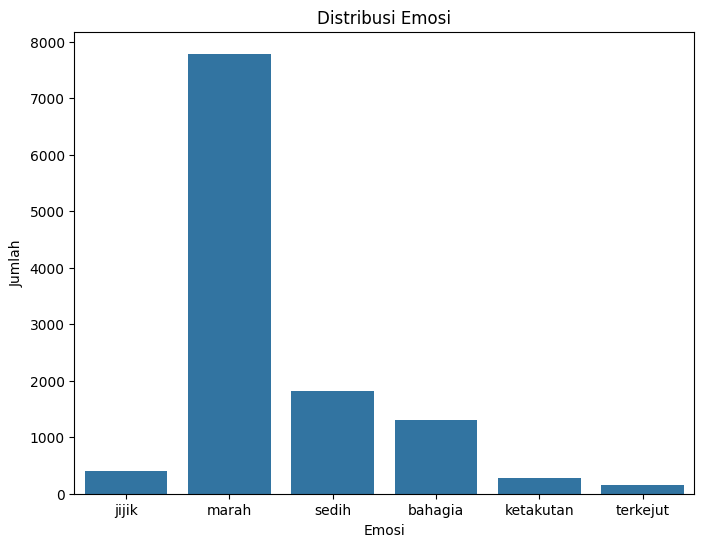

<ipython-input-14-5861f0cd88fe>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['message_length'] = data['message'].apply(len)


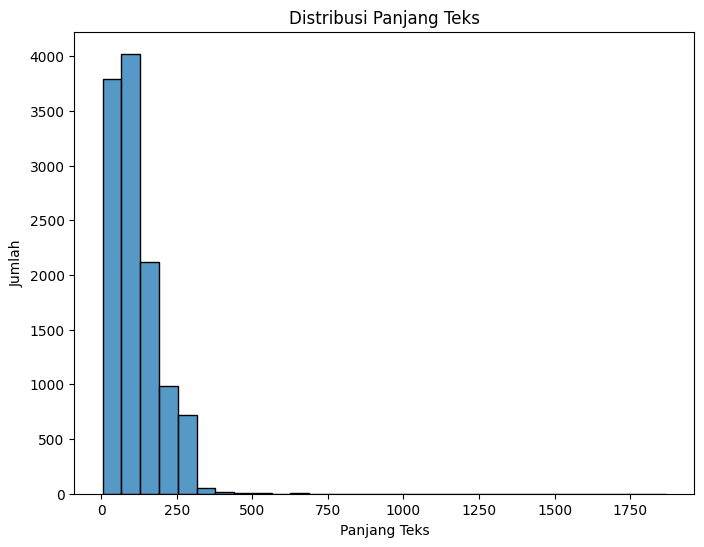

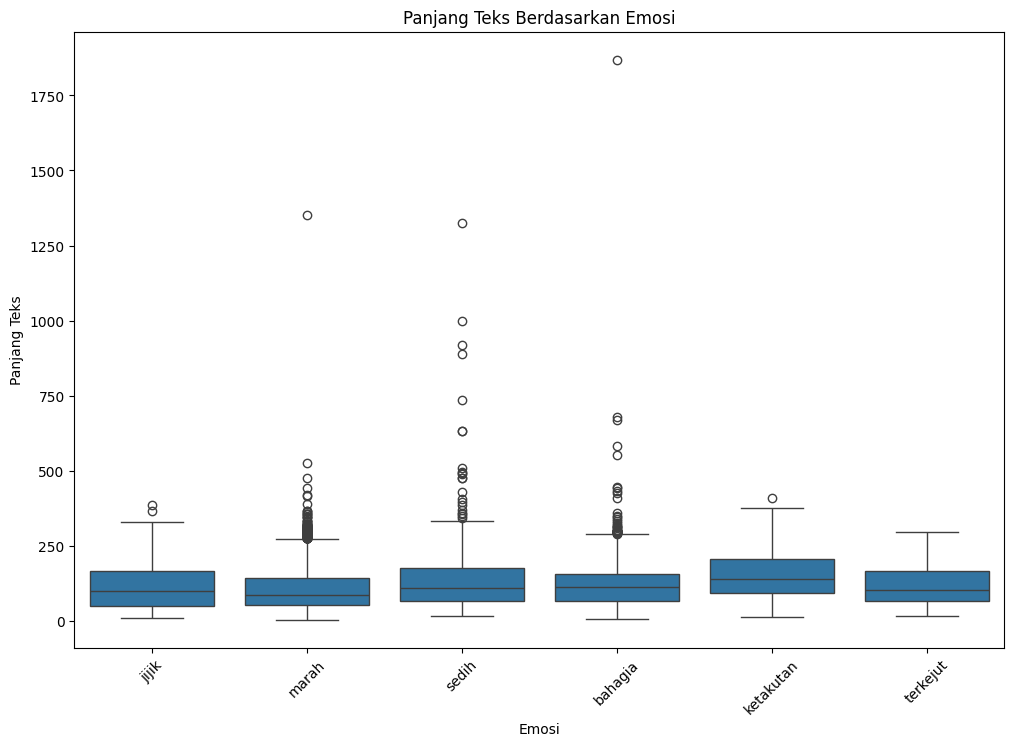

In [ ]:
# Menampilkan informasi dasar tentang dataset
print("Info Dataset:")
print(data.info())

# Menampilkan 5 baris pertama dataset
print("\nLima Baris Pertama Dataset:")
print(data.head())

# Statistik deskriptif untuk kolom-kolom numerik (jika ada)
print("\nStatistik Deskriptif:")
print(data.describe())

# Menampilkan distribusi kategori emosi
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='label_emosi')
plt.title('Distribusi Emosi')
plt.xlabel('Emosi')
plt.ylabel('Jumlah')
plt.show()

# Menampilkan panjang teks
data['message_length'] = data['message'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='message_length', bins=30)
plt.title('Distribusi Panjang Teks')
plt.xlabel('Panjang Teks')
plt.ylabel('Jumlah')
plt.show()

# Menampilkan panjang teks berdasarkan emosi
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='label_emosi', y='message_length')
plt.title('Panjang Teks Berdasarkan Emosi')
plt.xlabel('Emosi')
plt.ylabel('Panjang Teks')
plt.xticks(rotation=45)
plt.show()

# PREPROCESSING DATA

In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Data cleaning
def clean_text(text):
    emoticon_byte_regex = r"\s*(?:\\x[A-Fa-f0-9]{2})+"
    url_regex = r"((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+)||(http\S+))"

    text = re.sub(emoticon_byte_regex, "", text)  # remove emoticon bytes
    text = re.sub(url_regex, "", text)  # remove every url
    text = re.sub(r"<[^>]*>", "", text)  # remove html tags
    text = re.sub(r"@[A-Za-z0-9]+", "", text)  # remove twitter usernames
    text = re.sub(r"\n", " ", text)  # remove every new line '\n'
    text = re.sub("@[\w\-]+", "", text)  # remove mentions
    text = re.sub("RT", "", text)  # remove every retweet symbol
    text = re.sub("USER", "", text)  # remove every user
    text = re.sub(" URL", " ", text)  # remove word URL
    text = re.sub(" url", " ", text)  # remove word url
    text = re.sub("\+", " ", text)  # remove backslash
    text = re.sub("\s+", " ", text)  # remove special regular expression character
    text = re.sub("[^0-9a-zA-Z]", " ", text)  # remove punctuation
    text = re.sub("[^a-zA-Z]", " ", text)  # remove numbers
    text = re.sub(" +", " ", text)  # remove extra spaces
    # Remove URLs or links
    text = re.sub(r'http\S+', '', text)
    # Remove hashtags (#)
    text = re.sub(r'#\w+', '', text)
    # Remove usernames and mentions (@)
    text = re.sub(r'@\w+', '', text)
    # Remove retweets (RT)
    text = re.sub(r'RT', '', text)
    # Remove punctuation, new lines, numbers, blank spaces, and emojis
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d+', '', text)
    # Remove emojis (you can add more emoji patterns)
    text = re.sub(r'😀|😁|😂|😢', '', text)
    # Remove extra whitespace and leading/trailing spaces
    text = ' '.join(text.split())
    text = text.strip()
    return text

# Assuming 'data' is a DataFrame with a 'message' column
data['cleaning'] = data['message'].apply(clean_text)

# Case folding (convert to lowercase)
data['casefolding'] = data['cleaning'].str.lower()

# Tokenisasi
def word_tokenize_wrapper(text):
  return word_tokenize(text)
data['tokenisasi'] = data['casefolding'].apply(word_tokenize_wrapper)

# Load normalization dictionary from CSV
normalization_dict = {}
df_normalization = pd.read_csv(dataset_path + 'new_kamusalay.csv', encoding='ISO-8859-1')
for index, row in df_normalization.iterrows():
    key = row['tidak baku']
    value = row['baku']
    normalization_dict[key] = value

# Normalization function
def normalize_text(word_list):
    normalized_words = [normalization_dict.get(word, word) for word in word_list]
    return normalized_words

# Apply normalization
data['normalisasi'] = data['tokenisasi'].apply(normalize_text)

# Stopword removal using NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(word_list):
    stop_words = set(stopwords.words('indonesian'))
    filtered_words = [word for word in word_list if word not in stop_words]
    return filtered_words

# Apply stopword removal
data['stopword'] = data['normalisasi'].apply(remove_stopwords)

##Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemmed_wrapper(term):
  return stemmer.stem(term)
term_dict = {}
for document in data['stopword']:
  for term in document:
    if term not in term_dict:
      term_dict[term] = ' '
for term in term_dict:
  term_dict[term] = stemmed_wrapper(term)

# apply stemmed term to dataframe
def get_stemmed_term(document):
  return [term_dict[term] for term in document]
data['stemming'] = data['stopword'].apply(get_stemmed_term)
data["message_clean"] = [' '.join(map(str, l)) for l in data['stemming']]
data

<ipython-input-18-564302e0894a>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaning'] = data['message'].apply(clean_text)
<ipython-input-18-564302e0894a>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['casefolding'] = data['cleaning'].str.lower()
<ipython-input-18-564302e0894a>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

service         datetime                  username sentiment  \
0       youtube   6/3/2023 11:40             Suh3rm4n Bule  negative   
1       youtube   6/3/2023 10:07               VC GAMER YT  negative   
2       youtube   6/4/2023 20:40  saelan raaj verma kapoor  negative   
3       youtube    6/6/2023 5:50         Septiadi Nurfadil  negative   
4       youtube   6/5/2023 21:17            Grendel Oetama  negative   
...         ...              ...                       ...       ...   
12989  facebook  6/16/2023 18:15            nanang.ganz.77  positive   
12990  facebook  6/19/2023 20:26                     Sweet  negative   
12991  facebook  6/20/2023 20:03                     Indra  negative   
12992  facebook   7/2/2023 20:02                     Denji  negative   
12993  facebook   7/3/2023 18:11                      Dslm  negative   

                                                 message  emosi label_emosi  \
0      Undian nya tidak fair,coba klo waktu pas di un...      2       jijik   
1      INI NI NGELEK JARINGAN TELKOMSEL MACAM TAEK #s...      3       marah   
2                              jaringan buruk Telkomsel       3       marah   
3      Buat sya pribadi, yg buat saya berhenti pake t...      3       marah   
4      Sekelas telkomsel katanya kartu selluler elitn...      3       marah   
...                                                  ...    ...         ...   
12989           Wah Wajah Telkomsel mulai semakin bersih      4    terkejut   
12990  Mau nonton bola aja ngelag heran gua ama Telko...      3       marah   
12991  Jaringan Telkomsel lagi kenapa si . Biasanya j...      6       sedih   
12992  Boro2 internetan.. mau cek pulsa aja susahnya ...      6       sedih   
12993  Ayolah minnn kasih promo lahh\nIni di sini pro...      6       sedih   

       message_length                                           cleaning  \
0                 385  Undian nya tidak fair coba klo waktu pas di un...   
1                  69  INI NI NGELEK JARINGAN TELKOMSEL MACAM TAEK so...   
2                  25                           jaringan buruk Telkomsel   
3                 366  Buat sya pribadi yg buat saya berhenti pake te...   
4                 442  Sekelas telkomsel katanya kartu selluler elitn...   
...               ...                                                ...   
12989              40           Wah Wajah Telkomsel mulai semakin bersih   
12990             106  Mau nonton bola aja ngelag heran gua ama Telko...   
12991             244  Jaringan Telkomsel lagi kenapa si Biasanya jug...   
12992              89  Boro internetan mau cek pulsa aja susahnya min...   
12993              93  Ayolah minnn kasih promo lahh Ini di sini prom...   

                                             casefolding  \
0      undian nya tidak fair coba klo waktu pas di un...   
1      ini ni ngelek jaringan telkomsel macam taek so...   
2                               jaringan buruk telkomsel   
3      buat sya pribadi yg buat saya berhenti pake te...   
4      sekelas telkomsel katanya kartu selluler elitn...   
...                                                  ...   
12989           wah wajah telkomsel mulai semakin bersih   
12990  mau nonton bola aja ngelag heran gua ama telko...   
12991  jaringan telkomsel lagi kenapa si biasanya jug...   
12992  boro internetan mau cek pulsa aja susahnya min...   
12993  ayolah minnn kasih promo lahh ini di sini prom...   

                                              tokenisasi  \
0      [undian, nya, tidak, fair, coba, klo, waktu, p...   
1      [ini, ni, ngelek, jaringan, telkomsel, macam, ...   
2                           [jaringan, buruk, telkomsel]   
3      [buat, sya, pribadi, yg, buat, saya, berhenti,...   
4      [sekelas, telkomsel, katanya, kartu, selluler,...   
...                                                  ...   
12989    [wah, wajah, telkomsel, mulai, semakin, bersih]   
12990  [mau, nonton, bola, aja, ngelag, heran, gua, a...   
12991  [jaringan, te

In [ ]:
# data.to_csv("/content/drive/MyDrive/SKRIPSI/Data/dfpreprocessing.csv", index=False)

In [ ]:
# save temp data training
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/Data/dfpreprocessing.csv')
df

service         datetime                  username sentiment  \
0       youtube   6/3/2023 11:40             Suh3rm4n Bule  negative   
1       youtube   6/3/2023 10:07               VC GAMER YT  negative   
2       youtube   6/4/2023 20:40  saelan raaj verma kapoor  negative   
3       youtube    6/6/2023 5:50         Septiadi Nurfadil  negative   
4       youtube   6/5/2023 21:17            Grendel Oetama  negative   
...         ...              ...                       ...       ...   
11725  facebook  6/16/2023 18:15            nanang.ganz.77  positive   
11726  facebook  6/19/2023 20:26                     Sweet  negative   
11727  facebook  6/20/2023 20:03                     Indra  negative   
11728  facebook   7/2/2023 20:02                     Denji  negative   
11729  facebook   7/3/2023 18:11                      Dslm  negative   

                                                 message  emosi label_emosi  \
0      Undian nya tidak fair,coba klo waktu pas di un...      2       jijik   
1      INI NI NGELEK JARINGAN TELKOMSEL MACAM TAEK #s...      3       marah   
2                              jaringan buruk Telkomsel       3       marah   
3      Buat sya pribadi, yg buat saya berhenti pake t...      3       marah   
4      Sekelas telkomsel katanya kartu selluler elitn...      3       marah   
...                                                  ...    ...         ...   
11725           Wah Wajah Telkomsel mulai semakin bersih      4    terkejut   
11726  Mau nonton bola aja ngelag heran gua ama Telko...      3       marah   
11727  Jaringan Telkomsel lagi kenapa si . Biasanya j...      6       sedih   
11728  Boro2 internetan.. mau cek pulsa aja susahnya ...      6       sedih   
11729  Ayolah minnn kasih promo lahh\nIni di sini pro...      6       sedih   

       message_length                                           cleaning  \
0                 385  Undian nya tidak fair coba klo waktu pas di un...   
1                  69  INI NI NGELEK JARINGAN TELKOMSEL MACAM TAEK so...   
2                  25                           jaringan buruk Telkomsel   
3                 366  Buat sya pribadi yg buat saya berhenti pake te...   
4                 442  Sekelas telkomsel katanya kartu selluler elitn...   
...               ...                                                ...   
11725              40           Wah Wajah Telkomsel mulai semakin bersih   
11726             106  Mau nonton bola aja ngelag heran gua ama Telko...   
11727             244  Jaringan Telkomsel lagi kenapa si Biasanya jug...   
11728              89  Boro internetan mau cek pulsa aja susahnya min...   
11729              93  Ayolah minnn kasih promo lahh Ini di sini prom...   

                                             casefolding  \
0      undian nya tidak fair coba klo waktu pas di un...   
1      ini ni ngelek jaringan telkomsel macam taek so...   
2                               jaringan buruk telkomsel   
3      buat sya pribadi yg buat saya berhenti pake te...   
4      sekelas telkomsel katanya kartu selluler elitn...   
...                                                  ...   
11725           wah wajah telkomsel mulai semakin bersih   
11726  mau nonton bola aja ngelag heran gua ama telko...   
11727  jaringan telkomsel lagi kenapa si biasanya jug...   
11728  boro internetan mau cek pulsa aja susahnya min...   
11729  ayolah minnn kasih promo lahh ini di sini prom...   

                                              tokenisasi  \
0      ['undian', 'nya', 'tidak', 'fair', 'coba', 'kl...   
1      ['ini', 'ni', 'ngelek', 'jaringan', 'telkomsel...   
2                     ['jaringan', 'buruk', 'telkomsel']   
3      ['buat', 'sya', 'pribadi', 'yg', 'buat', 'saya...   
4      ['sekelas', 'telkomsel', 'katanya', 'kartu', '...   
...                                                  ...   
11725  ['wah', 'wajah', 'telkomsel', 'mulai', 'semaki...   
11726  ['mau', 'nonton', 'bola', 'aja', 'ngelag', 'he...   
11727  ['jaringan', 

## WordCloud

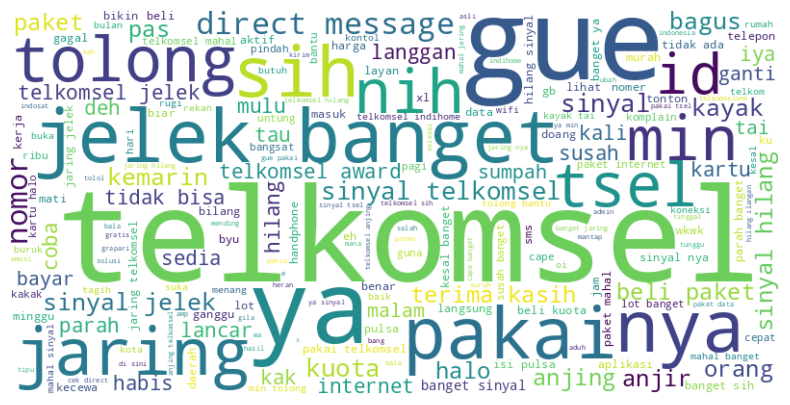

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Contoh data teks (pastikan data['message_clean'] merupakan list atau array dari string)
text = ' '.join(df['message_clean'].astype(str))

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menghilangkan sumbu x dan y
plt.show()


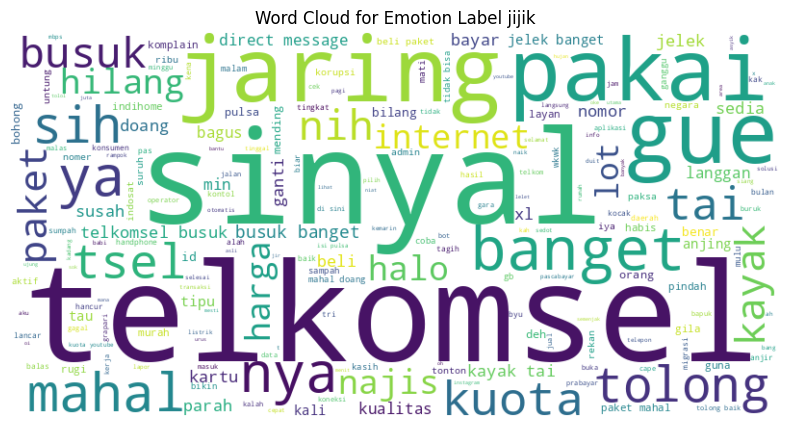

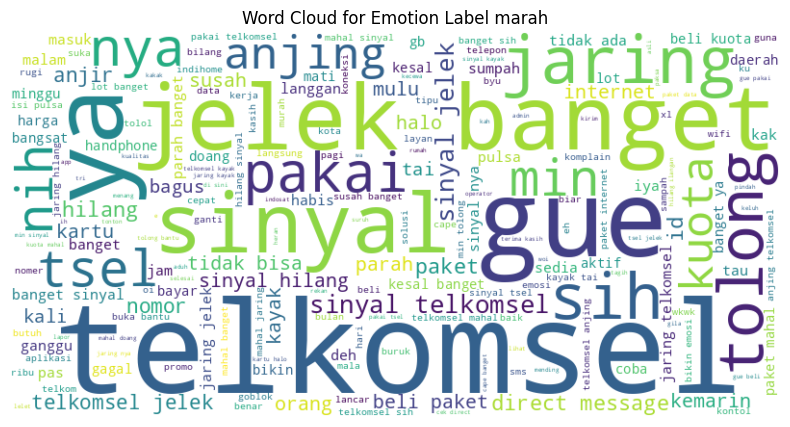

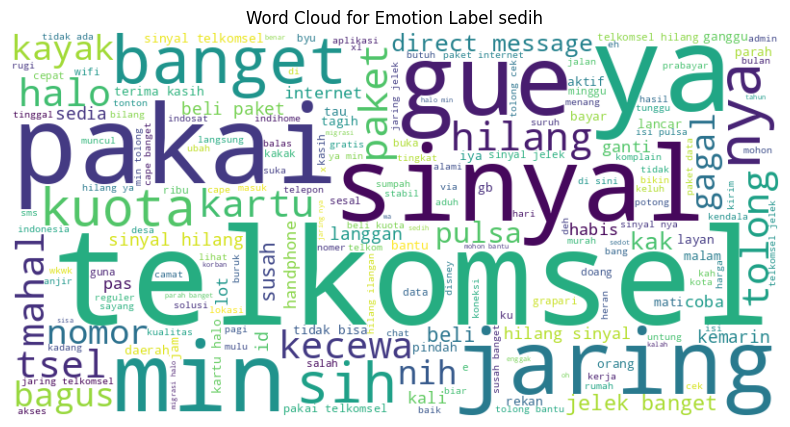

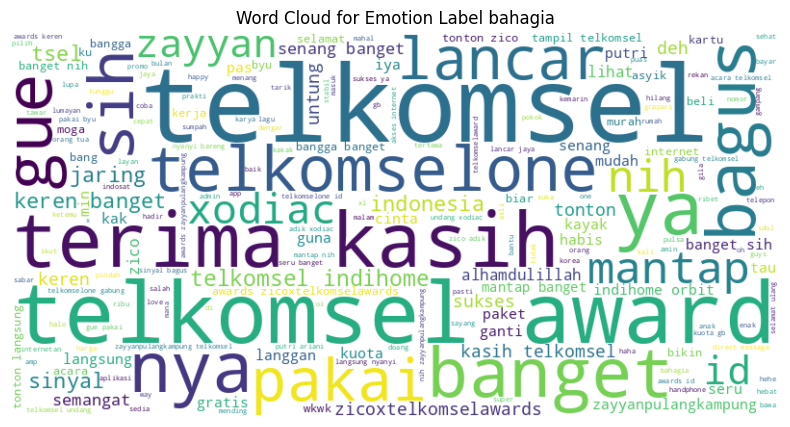

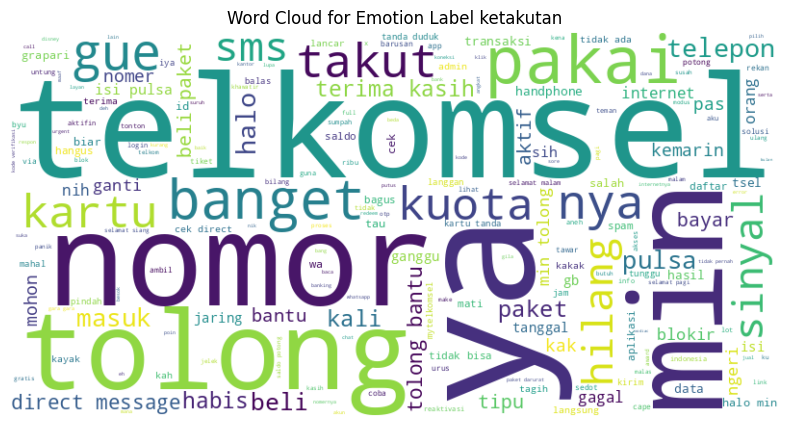

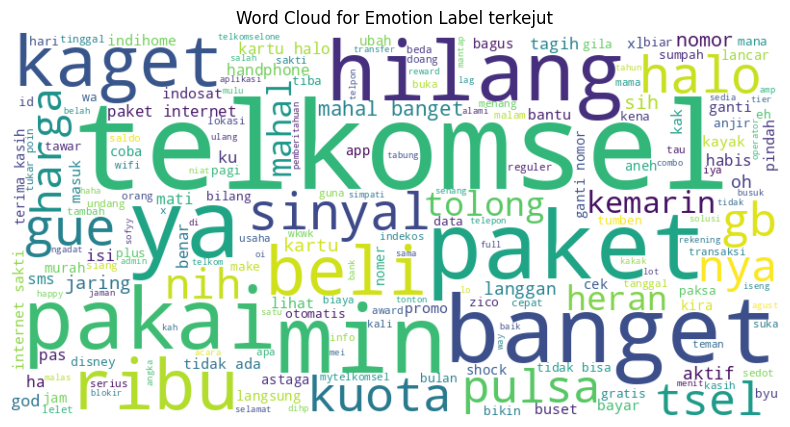

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'emo' is the column containing emotion labels (1-6)
unique_labels = df['label_emosi'].unique()

# Membuat word cloud untuk setiap label emosi
for label in unique_labels:
    # Filter DataFrame based on the current label
    subset_text = ' '.join(df[df['label_emosi'] == label]['message_clean'].astype(str))

    # Membuat objek WordCloud untuk setiap label
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subset_text)

    # Menampilkan word cloud menggunakan matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Emotion Label {label}')
    plt.axis('off')
    plt.show()


# IMBALANCED DATA

## Borderline SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Contoh dataset teks
X_text = df['message_clean']

y_labels = df['emosi']

# Contoh transformasi teks ke vektor fitur menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X_text)

# Inisialisasi Borderline SMOTE
borderline_smote = BorderlineSMOTE()

# Resampling dataset menggunakan Borderline SMOTE
X_resampled, y_resampled = borderline_smote.fit_resample(X_tfidf, y_labels)

# Jika ingin mengubah kembali vektor fitur menjadi teks, Anda dapat menggunakan invers transform
X_resampled_text = tfidf_vectorizer.inverse_transform(X_resampled)

# Sekarang X_resampled_text berisi teks yang telah di-resample
print("Teks setelah resampling:")
for text in X_resampled_text:
    print(text)


Streaming output truncated to the last 5000 lines.
 'beli' 'tsel' 'kuota' 'eh' 'wifi' 'ampas' 'anak' 'malam' 'balas' 'tahan'
 'tiba' 'streak' 'kos']
['coba' 'pulsa' 'isi' 'sih' 'kuota' 'malam' 'dana' 'halo' 'paket' 'potong'
 'beli' 'saldo' 'gagal' 'kembali' 'gopaylater']
['coba' 'grapari' 'ganti' 'sinyal' 'jaring' 'handphone' 'kasih' 'di'
 'tsel' 'terima' 'tolong' 'hari' 'hasil' 'ruang' 'min' 'cek' 'area'
 'tangsel' 'luar' 'puri' 'pamulang']
['halo' 'rugi' 'pas' 'paket' 'pakai' 'mahal' 'tidak' 'bisa' 'habis'
 'tolong' 'min' 'sisa' 'app' 'internetnya' 'browsing' 'dibutuhin']
['tai' 'mahal' 'puter' 'wa' 'lancar' 'bayar' 'mbps' 'kualitas' 'buka'
 'data' 'streaming' 'mu' 'kemarin' 'up' 'payah' 'cc' 'wlpn' 'gombal'
 'banget' 'paket' 'mending' 'pakai' 'ya' 'gue' 'kecewa' 'internet' 'guna'
 'tonton' 'kuota' 'youtube' 'jadi' 'normal' 'pisah' 'printilan']
['loding' 'lambat' 'data' 'akses' 'lemah']
['banget' 'paket' 'pakai' 'wa' 'bisa' 'buka' 'khusus' 'tiktok' 'instagram'
 'lola' 'nya' 'mending'

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Contoh dataset teks
X_text = df['message_clean']

y_labels = df['emosi']

# Contoh transformasi teks ke vektor fitur menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X_text)

# Data asli sebelum resampling
print("Data Asli (Sebelum Resampling):")
print("Jumlah Data:", len(X_text))
print("Jumlah Label Emosi:", len(y_labels))
print("Contoh Teks:")
for i in range(21):  # Tampilkan 3 contoh saja
    print(X_text[i])
    print("")

# Inisialisasi Borderline SMOTE
borderline_smote = BorderlineSMOTE()

# Resampling dataset menggunakan Borderline SMOTE
X_resampled, y_resampled = borderline_smote.fit_resample(X_tfidf, y_labels)

# Data setelah resampling
# Data setelah resampling
print("Data Setelah Resampling:")
print("Jumlah Data Baru:", X_resampled.shape[0])
print("Jumlah Label Emosi Baru:", len(y_resampled))
print("")

# Jika ingin mengubah kembali vektor fitur menjadi teks, Anda dapat menggunakan invers transform
X_resampled_text = tfidf_vectorizer.inverse_transform(X_resampled)

# Contoh teks setelah resampling
print("Contoh Teks Setelah Resampling:")
for i in range(21):  # Tampilkan 3 contoh saja
    print(X_resampled_text[i])
    print("")


Data Asli (Sebelum Resampling):
Jumlah Data: 11730
Jumlah Label Emosi: 11730
Contoh Teks:
undi nya fair coba pas undi live bukti kesal banget operator telkomsel kartu halo suruh ganti pascabayar janjiin sinyal bagus jamin tai kuda poin pulsa paket daftar hilang anjing emamg operator tai dajal operator telkomsel telepon mending angkat diam rijek

nih ngelek jaring telkomsel tai soundmeme shorts short

jaring buruk telkomsel

pribadi henti pakai telkomsel ya harga quotanya mahal banget banget banget cari telkomsel gengsi doang sinyal bagus rumah orang tua jelek banget kalah sedia murah sinyal kuat tempat inti telkomsel mahal

kelas telkomsel kartu selluler elitnya indonesia sinyal rumah e ram gb mantan tenaga kerja indonesia malaysia brunei ju r telkomsel nya banding seluler negara tetangga sanding kartu kelas teri telkomsel kalah oohhh telkomsel telkomsel paket mahal sinyal kena angin quot e quot paket boros pakai wajar bikin panas handphone gue puter sinyal

fakta isi pulsa hilang pemb

In [ ]:
import pandas as pd

# Membuat DataFrame baru dengan data teks yang sudah di-resampling
df_resampled = pd.DataFrame({'message_resampled': [' '.join(text) for text in X_resampled_text], 'emosi_resampled': y_resampled})

# Tampilkan DataFrame baru
print(df_resampled.head())

                                   message_resampled  emosi_resampled
0  rijek diam angkat mending telepon dajal emamg ...                2
1  short shorts soundmeme jaring ngelek nih tai t...                3
2                             buruk jaring telkomsel                3
3  inti tempat kuat murah sedia kalah jelek tua o...                3
4  puter gue handphone panas bikin wajar boros qu...                3


In [ ]:
# df_resampled.to_csv("/content/drive/MyDrive/SKRIPSI/Data/dfresampled.csv", index=False)

In [ ]:
# save temp data training
import pandas as pd
df_resampled = pd.read_csv('/content/drive/MyDrive/SKRIPSI/Data/dfresampled.csv')
df_resampled

message_resampled  emosi_resampled
0      rijek diam angkat mending telepon dajal emamg ...                2
1      short shorts soundmeme jaring ngelek nih tai t...                3
2                                 buruk jaring telkomsel                3
3      inti tempat kuat murah sedia kalah jelek tua o...                3
4      puter gue handphone panas bikin wajar boros qu...                3
...                                                  ...              ...
46711  hilang telepon angkat jaring orang tempat kaya...                6
46712  tolong hadir internetnya telkomselawards bange...                6
46713  hilang jaring pakai limit sayang kemarin rekan...                6
46714  coba daftar nomor byu didaftarin pakai gue kad...                6
46715                   banget telkomsel sih busuk heran                6

[46716 rows x 2 columns]

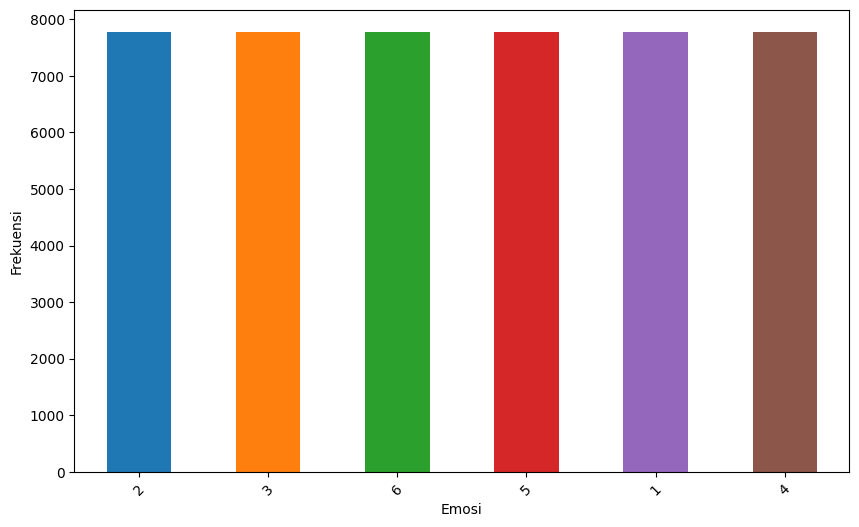

In [ ]:
import matplotlib.pyplot as plt

# Hitung frekuensi masing-masing nilai emosi_resampled
value_counts = df_resampled['emosi_resampled'].value_counts()

# Buat bar plot dengan warna yang berbeda
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(range(len(value_counts)))
value_counts.plot(kind='bar', color=colors)
plt.xlabel('Emosi')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Periksa duplikat
duplicates = df_resampled[df_resampled.duplicated(subset=['message_resampled'])]
print("Data yang duplikat:")
print(duplicates)

Data yang duplikat:
                                       message_resampled  emosi_resampled
92                                                mantap                5
93                                         semangat bang                5
190                             amp putri selamat sukses                5
217                                               mantap                5
228                                               mantap                5
...                                                  ...              ...
46708  hilang kah nonaktif nya mending buruk gue tau ...                6
46709  isi sih min cape unlimited nya telkomsel paket...                6
46710  hilang ya total tsel jaring potong kadang pelo...                6
46711  hilang telepon angkat jaring orang tempat kaya...                6
46714  coba daftar nomor byu didaftarin pakai gue kad...                6

[27996 rows x 2 columns]


In [ ]:
df_resampled.describe()

emosi_resampled
count     46716.000000
mean          3.500000
std           1.707843
min           1.000000
25%           2.000000
50%           3.500000
75%           5.000000
max           6.000000

In [ ]:
import pandas as pd

# Membuat DataFrame baru dengan data teks yang sudah di-resampling
df_resampled = pd.DataFrame({'message_resampled': [' '.join(text) for text in X_resampled_text], 'emosi_resampled': y_resampled})

# Hapus duplikat
df_resampled_no_duplicates = df_resampled.drop_duplicates(subset=['message_resampled'])

# Tampilkan DataFrame baru setelah menghapus duplikat
print("DataFrame setelah menghapus duplikat:")
print(df_resampled_no_duplicates.head())


DataFrame setelah menghapus duplikat:
                                   message_resampled  emosi_resampled
0  rijek diam angkat mending telepon dajal emamg ...                2
1  short shorts soundmeme jaring ngelek nih tai t...                3
2                             buruk jaring telkomsel                3
3  inti tempat kuat murah sedia kalah jelek tua o...                3
4  puter gue handphone panas bikin wajar boros qu...                3


In [ ]:
df_resampled_no_duplicates.describe()

emosi_resampled
count     18720.000000
mean          4.086058
std           1.564408
min           1.000000
25%           3.000000
50%           3.000000
75%           6.000000
max           6.000000

In [ ]:
df_resampled_no_duplicates[['emosi_resampled']].value_counts()

emosi_resampled
3                  7440
6                  5493
5                  3223
2                  1079
1                  1000
4                   485
dtype: int64

# WORD EMBEDDING

In [ ]:
from urllib.request import urlopen
import gzip
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [ ]:
# Membuat embedding matrix
def create_embedding_matrix(vocab_and_vectors, word_index, embedding_dim):
    num_words = len(word_index) + 1
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        if i >= num_words:
            continue
        vector = vocab_and_vectors.get(word)
        if vector is not None:
            embedding_matrix[i] = vector
    return embedding_matrix

# Dimensi embedding FastText
embedding_dim = 300

# Inisialisasi tokenizer
tokenizer = Tokenizer()

# Tokenize and pad the text data
max_seq_length = 400  # Define the maximum sequence length
tokenizer.fit_on_texts(df_resampled['message_resampled'])
sequences = tokenizer.texts_to_sequences(df_resampled['message_resampled'])
X = pad_sequences(sequences, maxlen=max_seq_length)

# Prepare the labels
y = df_resampled["emosi_resampled"]

# Subtract 1 from labels to make them start from 0
y = y - 1

# Calculate the number of classes based on the adjusted labels
num_classes = max(y) + 1

# Convert adjusted labels to categorical format
Y = to_categorical(y, num_classes=num_classes)

# Mendownload model FastText untuk bahasa Indonesia
url = 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz'

with gzip.open(urlopen(url), 'rt', encoding='utf-8') as file:
    vocab_and_vectors = {}  # memetakan kata ke vektor
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        vocab_and_vectors[word] = vector

# Membuat embedding matrix
embedding_matrix = create_embedding_matrix(vocab_and_vectors, tokenizer.word_index, embedding_dim)


In [ ]:
# Count unique words
num_unique_words = len(tokenizer.word_index)
print("Number of unique words:", num_unique_words)

Number of unique words: 9486


In [ ]:
# Display an example of word indexing
print("Original Text:\n", df_resampled['message_resampled'][2000])
print("\nIndexed Sequence:\n", sequences[2000])

# Display an example of padded sequence
X_padded = pad_sequences([sequences[2000]], maxlen=max_seq_length)
print("\nPadded Sequence:\n", X_padded)

# Display an example of word embedding
word_index = tokenizer.word_index
example_word = list(word_index.keys())[0]
example_embedding = vocab_and_vectors.get(example_word)
print("\nExample Word Embedding for '{}':\n".format(example_word), example_embedding)

Original Text:
 ampun deh jelek mahal sinyal telkomsel

Indexed Sequence:
 [578, 104, 30, 13, 3, 1]

Padded Sequence:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Function to find similar words
def find_similar_words(word, embedding_matrix, word_index, top_n=5):
    if word in word_index:
        idx = word_index[word]
        embedding = embedding_matrix[idx].reshape(1, -1)  # Reshape to 2D array for cosine similarity
        cosine_similarities = cosine_similarity(embedding, embedding_matrix)
        similar_words = [(word, 1.0)]  # Add the input word itself with similarity 1.0
        for idx_similar in cosine_similarities.argsort()[0][-top_n-1:-1]:
            similar_word = next(key for key, value in word_index.items() if value == idx_similar)
            similarity = cosine_similarities[0][idx_similar]
            similar_words.append((similar_word, similarity))
        return similar_words
    else:
        print(f"Word '{word}' not found in vocabulary.")
        return []

# Example: Find similar words to "senang"
similar_words = find_similar_words("senang", embedding_matrix, tokenizer.word_index)
print("\nSimilar Words to 'senang':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Similar Words to 'senang':
senang: 1.0000
bangga: 0.6637
bahagia: 0.6647
puas: 0.6810
gembira: 0.7234
suka: 0.7408


# SPLITTING DATASET

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# Set seed untuk angka acak
np.random.seed(42)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

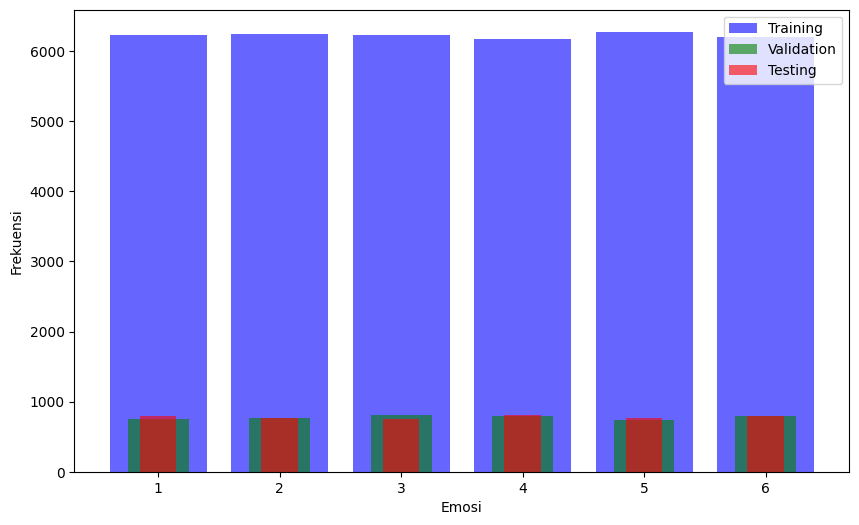

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each label in training data
train_label_counts = np.bincount(y_train)
# Count occurrences of each label in validation data
val_label_counts = np.bincount(y_val)
# Count occurrences of each label in testing data
test_label_counts = np.bincount(y_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_classes), train_label_counts, color='blue', alpha=0.6, label='Training')
plt.bar(np.arange(num_classes), val_label_counts, color='green', alpha=0.6, label='Validation', width=0.5)
plt.bar(np.arange(num_classes), test_label_counts, color='red', alpha=0.6, label='Testing', width=0.3)
plt.xlabel('Emosi')
plt.ylabel('Frekuensi')
plt.xticks(np.arange(num_classes), [str(i+1) for i in range(num_classes)])
plt.legend()
plt.show()

In [ ]:
# Print the counts of each label in training, validation, and testing data
print("Training Data Label Counts:")
for label, count in enumerate(train_label_counts):
    print(f"Label {label+1}: {count}")

print("\nValidation Data Label Counts:")
for label, count in enumerate(val_label_counts):
    print(f"Label {label+1}: {count}")

print("\nTesting Data Label Counts:")
for label, count in enumerate(test_label_counts):
    print(f"Label {label+1}: {count}")


Training Data Label Counts:
Label 1: 6231
Label 2: 6249
Label 3: 6233
Label 4: 6181
Label 5: 6279
Label 6: 6199

Validation Data Label Counts:
Label 1: 758
Label 2: 771
Label 3: 807
Label 4: 794
Label 5: 745
Label 6: 797

Testing Data Label Counts:
Label 1: 797
Label 2: 766
Label 3: 746
Label 4: 811
Label 5: 762
Label 6: 790


# HYPERPARAMETER TUNING

## Jumlah Unit BiLSTM

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 300)         2846100   
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                85248     
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 6)                 390       
                                                                 
Total params: 2935898 (11.20 MB)
Trainable params: 89798 (350.77 KB)
Non-trainable params: 2846100 (10.86 MB)
__________

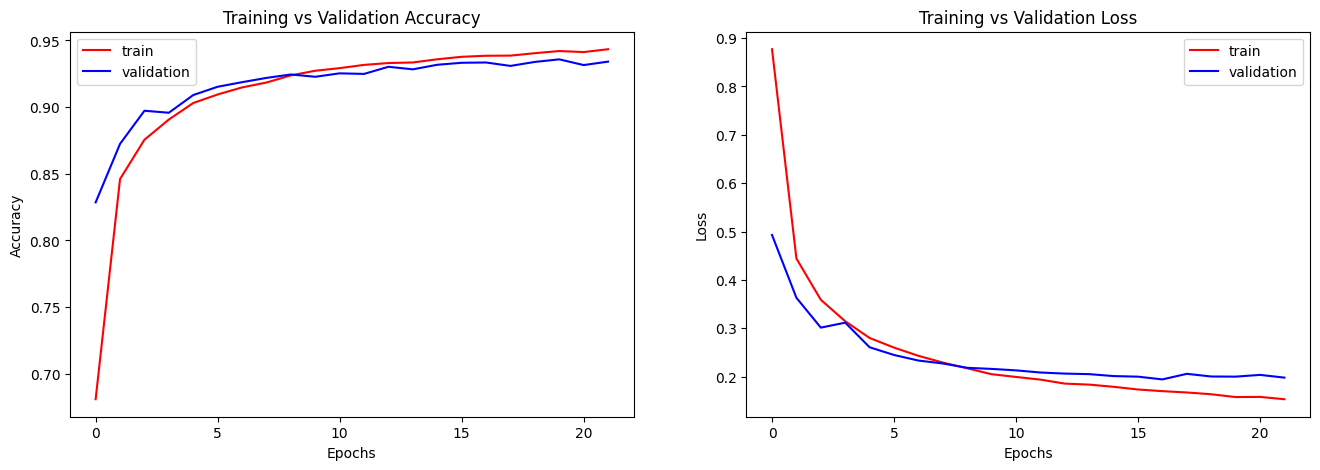

146/146 [==============================] - 2s 12ms/step - loss: 0.1943 - accuracy: 0.9334
Hyperparameter: 32
loss: 0.19430382549762726 | accuracy: 93.34332346916199
146/146 [==============================] - 2s 11ms/step
[[737   0  20   0   0   1]
 [  0 733  35   0   2   1]
 [  4   5 756   0  16  26]
 [  1   0   7 785   0   1]
 [  0   0  27   0 716   2]
 [  2   3 132   3  23 634]]
              precision    recall  f1-score   support

           0     0.9906    0.9723    0.9814       758
           1     0.9892    0.9507    0.9696       771
           2     0.7738    0.9368    0.8475       807
           3     0.9962    0.9887    0.9924       794
           4     0.9458    0.9611    0.9534       745
           5     0.9534    0.7955    0.8673       797

    accuracy                         0.9334      4672
   macro avg     0.9415    0.9342    0.9353      4672
weighted avg     0.9404    0.9334    0.9343      4672

Model: "sequential_6"
___________________________________________________

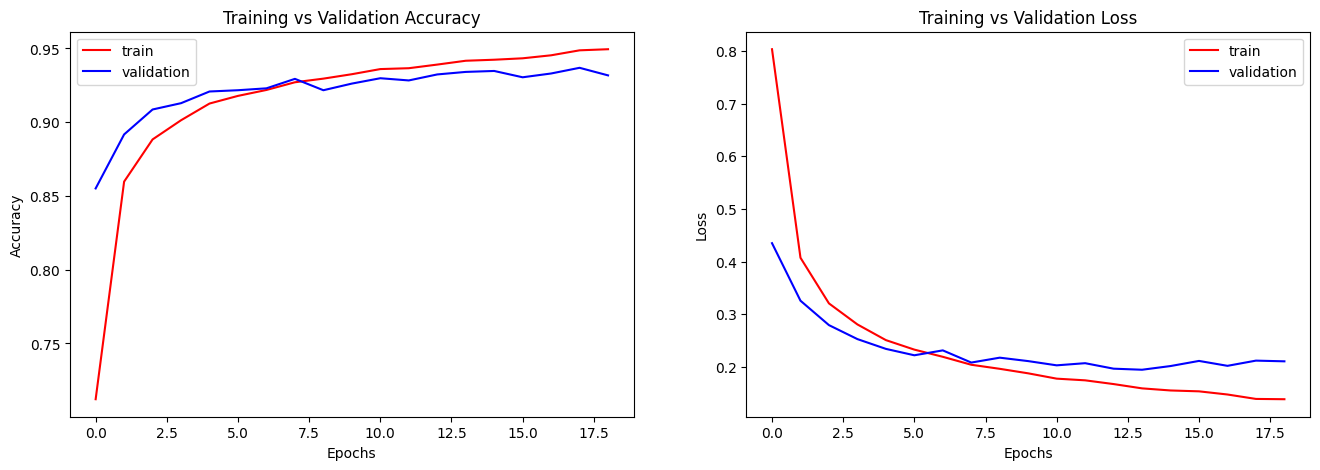

146/146 [==============================] - 2s 12ms/step - loss: 0.1949 - accuracy: 0.9341
Hyperparameter: 64
loss: 0.1949276477098465 | accuracy: 93.40753555297852
146/146 [==============================] - 3s 14ms/step
[[739   0  17   0   0   2]
 [  0 726  40   0   2   3]
 [  8   1 765   0   6  27]
 [  2   0   5 786   0   1]
 [  1   0  34   0 706   4]
 [  6   1 135   2  11 642]]
              precision    recall  f1-score   support

           0     0.9775    0.9749    0.9762       758
           1     0.9973    0.9416    0.9686       771
           2     0.7681    0.9480    0.8486       807
           3     0.9975    0.9899    0.9937       794
           4     0.9738    0.9477    0.9605       745
           5     0.9455    0.8055    0.8699       797

    accuracy                         0.9341      4672
   macro avg     0.9433    0.9346    0.9363      4672
weighted avg     0.9419    0.9341    0.9353      4672

Model: "sequential_7"
____________________________________________________

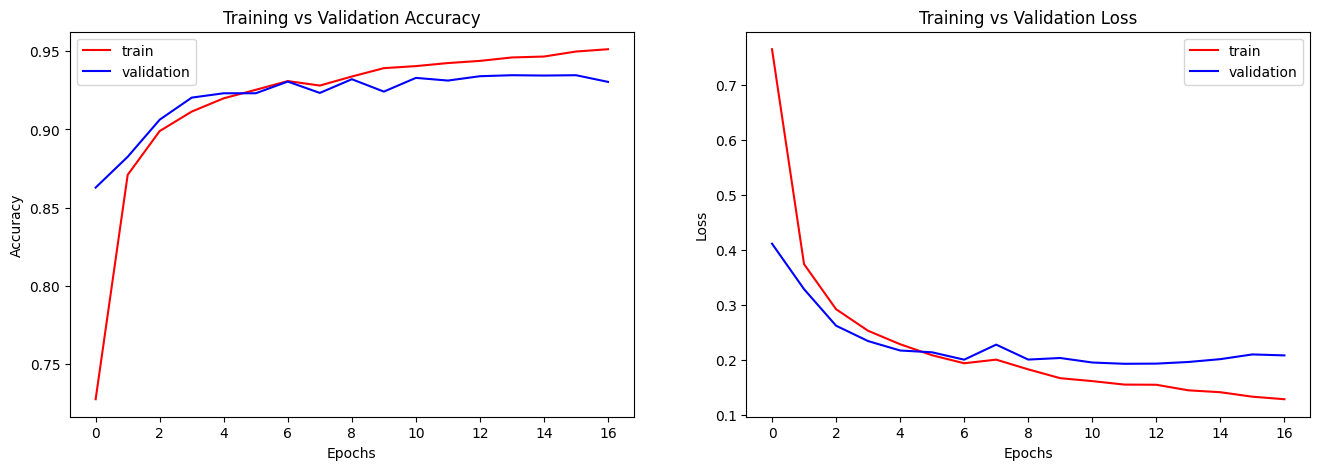

146/146 [==============================] - 3s 17ms/step - loss: 0.1934 - accuracy: 0.9313
Hyperparameter: 128
loss: 0.19342385232448578 | accuracy: 93.12928318977356
146/146 [==============================] - 3s 11ms/step
[[735   0  21   0   0   2]
 [  0 734  34   0   2   1]
 [  2   3 727   1  22  52]
 [  1   0   6 786   0   1]
 [  0   0  14   0 723   8]
 [  1   2 126   3  19 646]]
              precision    recall  f1-score   support

           0     0.9946    0.9697    0.9820       758
           1     0.9932    0.9520    0.9722       771
           2     0.7834    0.9009    0.8380       807
           3     0.9949    0.9899    0.9924       794
           4     0.9439    0.9705    0.9570       745
           5     0.9099    0.8105    0.8573       797

    accuracy                         0.9313      4672
   macro avg     0.9366    0.9322    0.9332      4672
weighted avg     0.9354    0.9313    0.9320      4672



In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X_train, X_val, y_train, y_val are defined

unit_bilstm = [32, 64, 128]
hasil_loss = []
hasil_akurasi = []
hasil_fone = []

for i in unit_bilstm:
    score_loss = []
    score_akurasi = []
    score_fone = []

    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                    weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(LSTM(i, dropout=0.1)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',  # Change the loss function
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    es = EarlyStopping(restore_best_weights=True, monitor='val_loss', mode='min', verbose=1, patience=5)
    print(model.summary())

    # Use integer-encoded labels directly
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_val, y_val), callbacks=[es])

    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], color='red')
    plt.plot(history.history['val_accuracy'], color='blue')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend(['train', 'validation'], loc='best')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], color='red')
    plt.plot(history.history['val_loss'], color='blue')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend(['train', 'validation'])
    plt.show()

    score = model.evaluate(X_val, y_val, verbose=1)
    print('Hyperparameter: ' + str(i))
    print(str(model.metrics_names[0]) + ": " + str(score[0]) + " | " + str(model.metrics_names[1]) + ": " + str(score[1] * 100))

    y_pred = model.predict(X_val)
    y_pred = y_pred.argmax(axis=1)
    cm = confusion_matrix(y_val, y_pred)  # No need to use .argmax(axis=1) for y_val
    print(cm)
    print(classification_report(y_val, y_pred, digits=4, output_dict=False))
    report = classification_report(y_val, y_pred, digits=4, output_dict=False)


## Jumlah Neuron

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 300)         2846100   
                                                                 
 bidirectional_12 (Bidirect  (None, 128)               186880    
 ional)                                                          
                                                                 
 dense_24 (Dense)            (None, 32)                4128      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 6)                 198       
                                                                 
Total params: 3037306 (11.59 MB)
Trainable params: 191206 (746.90 KB)
Non-trainable params: 2846100 (10.86 MB)
________

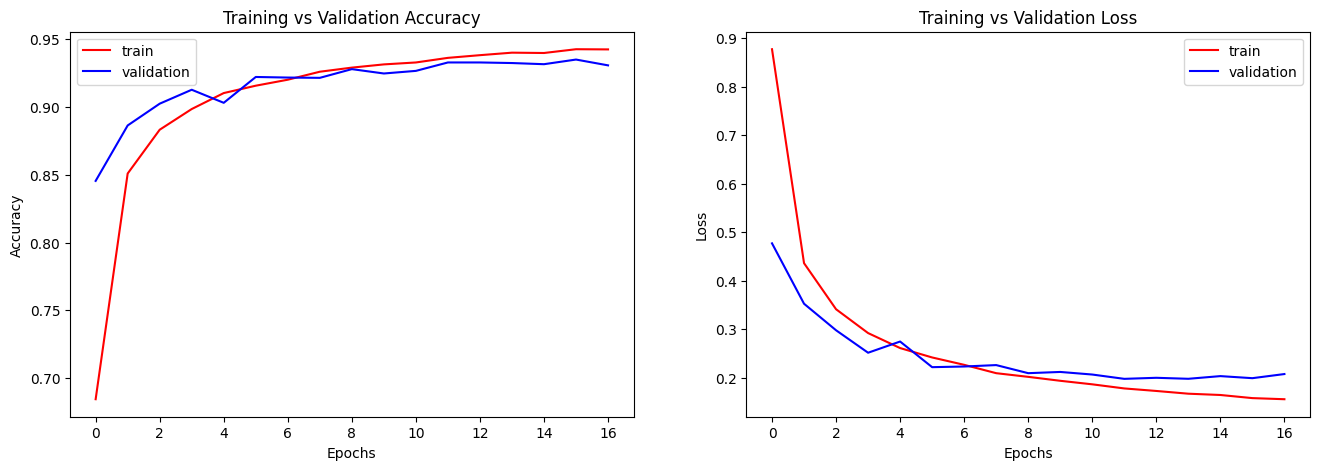

146/146 [==============================] - 3s 13ms/step - loss: 0.1974 - accuracy: 0.9328
Hyperparameter: 32
loss: 0.1974385678768158 | accuracy: 93.27911138534546
146/146 [==============================] - 2s 11ms/step
[[732   0  24   0   0   2]
 [  0 726  40   0   2   3]
 [  0   2 773   1  10  21]
 [  0   0   9 784   0   1]
 [  0   0  31   0 707   7]
 [  3   1 139   1  17 636]]
              precision    recall  f1-score   support

           0     0.9959    0.9657    0.9806       758
           1     0.9959    0.9416    0.9680       771
           2     0.7608    0.9579    0.8481       807
           3     0.9975    0.9874    0.9924       794
           4     0.9606    0.9490    0.9548       745
           5     0.9493    0.7980    0.8671       797

    accuracy                         0.9328      4672
   macro avg     0.9433    0.9333    0.9351      4672
weighted avg     0.9420    0.9328    0.9341      4672

Model: "sequential_13"
___________________________________________________

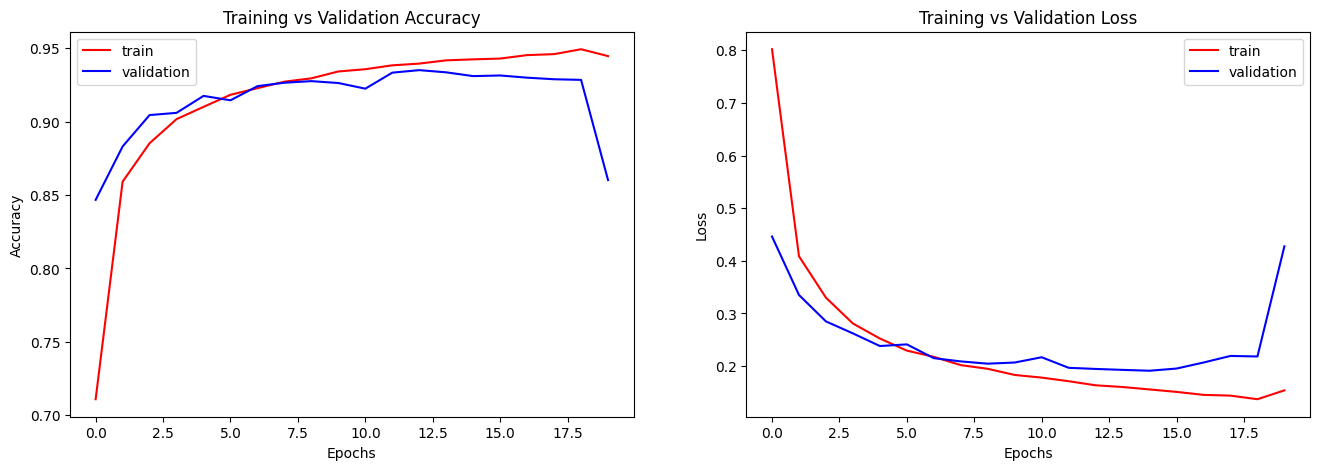

146/146 [==============================] - 3s 13ms/step - loss: 0.1913 - accuracy: 0.9311
Hyperparameter: 64
loss: 0.19130027294158936 | accuracy: 93.10787916183472
146/146 [==============================] - 3s 14ms/step
[[738   0  19   0   0   1]
 [  0 731  37   0   2   1]
 [  5   1 739   1  11  50]
 [  1   0   7 784   0   2]
 [  2   0  22   0 713   8]
 [  6   2 126   3  15 645]]
              precision    recall  f1-score   support

           0     0.9814    0.9736    0.9775       758
           1     0.9959    0.9481    0.9714       771
           2     0.7779    0.9157    0.8412       807
           3     0.9949    0.9874    0.9912       794
           4     0.9622    0.9570    0.9596       745
           5     0.9123    0.8093    0.8577       797

    accuracy                         0.9311      4672
   macro avg     0.9374    0.9319    0.9331      4672
weighted avg     0.9361    0.9311    0.9320      4672

Model: "sequential_14"
__________________________________________________

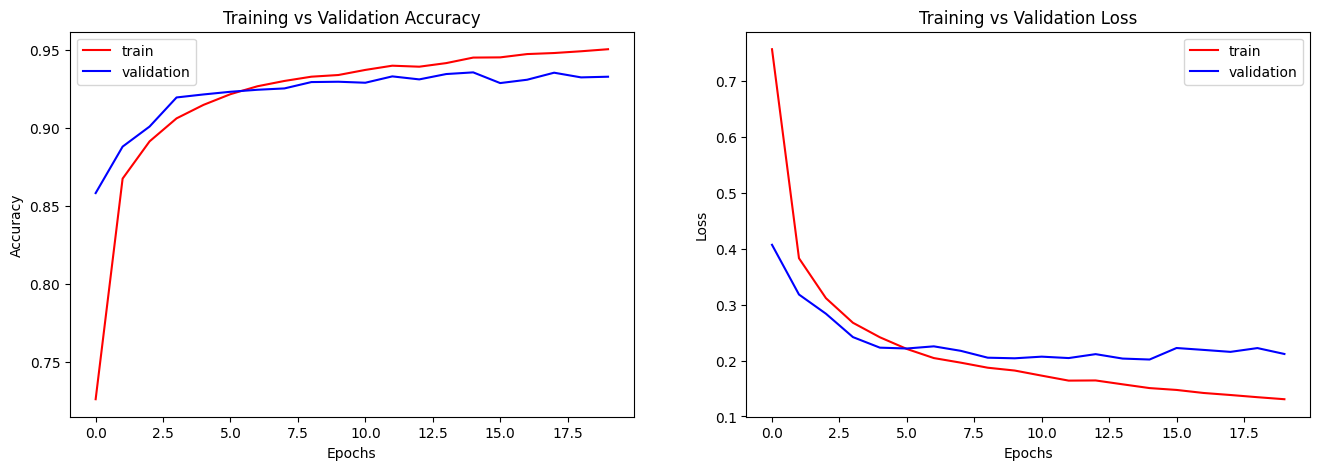

146/146 [==============================] - 3s 16ms/step - loss: 0.2019 - accuracy: 0.9356
Hyperparameter: 128
loss: 0.20189866423606873 | accuracy: 93.55736374855042
146/146 [==============================] - 3s 12ms/step
[[735   0  21   1   0   1]
 [  0 733  35   0   2   1]
 [  2   4 765   2  11  23]
 [  0   0   7 786   0   1]
 [  0   0  24   0 716   5]
 [  2   1 134   3  21 636]]
              precision    recall  f1-score   support

           0     0.9946    0.9697    0.9820       758
           1     0.9932    0.9507    0.9715       771
           2     0.7759    0.9480    0.8533       807
           3     0.9924    0.9899    0.9912       794
           4     0.9547    0.9611    0.9579       745
           5     0.9535    0.7980    0.8689       797

    accuracy                         0.9356      4672
   macro avg     0.9440    0.9362    0.9374      4672
weighted avg     0.9428    0.9356    0.9364      4672



In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X_train, X_val, y_train, y_val are defined

neurons = [32, 64, 128]
hasil_loss = []
hasil_akurasi = []
hasil_fone = []

for i in neurons:
    score_loss = []
    score_akurasi = []
    score_fone = []

    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                    weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(LSTM(64, dropout=0.1)))
    model.add(Dense(i, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',  # Change the loss function
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    es = EarlyStopping(restore_best_weights=True, monitor='val_loss', mode='min', verbose=1, patience=5)
    print(model.summary())

    # Use integer-encoded labels directly
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_val, y_val), callbacks=[es])

    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], color='red')
    plt.plot(history.history['val_accuracy'], color='blue')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend(['train', 'validation'], loc='best')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], color='red')
    plt.plot(history.history['val_loss'], color='blue')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend(['train', 'validation'])
    plt.show()

    score = model.evaluate(X_val, y_val, verbose=1)
    print('Hyperparameter: ' + str(i))
    print(str(model.metrics_names[0]) + ": " + str(score[0]) + " | " + str(model.metrics_names[1]) + ": " + str(score[1] * 100))

    y_pred = model.predict(X_val)
    y_pred = y_pred.argmax(axis=1)
    cm = confusion_matrix(y_val, y_pred)  # No need to use .argmax(axis=1) for y_val
    print(cm)
    print(classification_report(y_val, y_pred, digits=4, output_dict=False))
    report = classification_report(y_val, y_pred, digits=4, output_dict=False)


## Jumlah Dropout

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 300)         2846100   
                                                                 
 bidirectional_15 (Bidirect  (None, 128)               186880    
 ional)                                                          
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 6)                 774       
                                                                 
Total params: 3050266 (11.64 MB)
Trainable params: 204166 (797.52 KB)
Non-trainable params: 2846100 (10.86 MB)
________

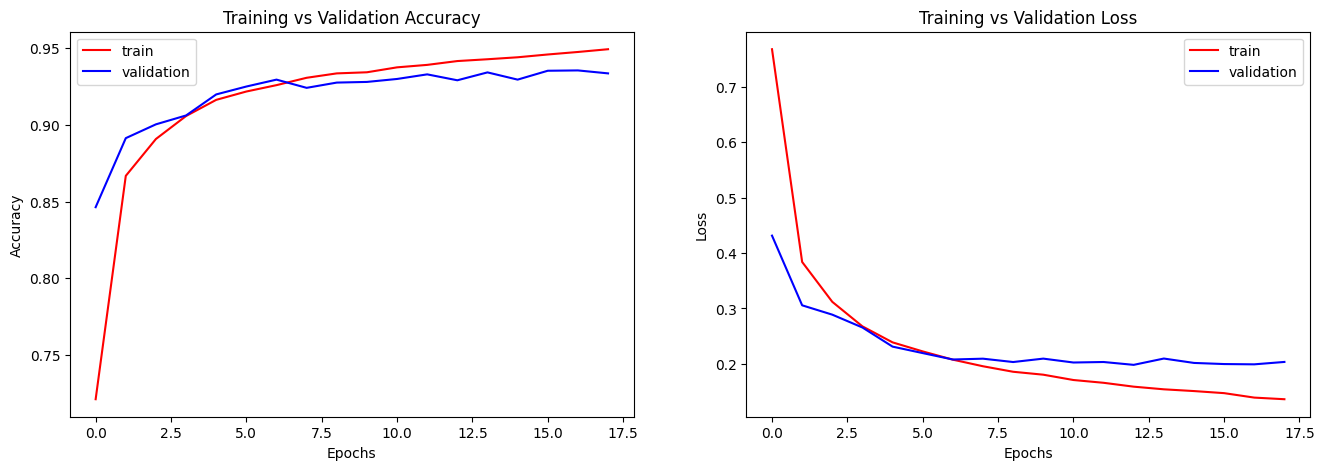

146/146 [==============================] - 3s 14ms/step - loss: 0.1982 - accuracy: 0.9289
Hyperparameter: 0.1
loss: 0.1982196569442749 | accuracy: 92.89383292198181
146/146 [==============================] - 2s 11ms/step
[[739   0  17   0   0   2]
 [  0 730  35   0   2   4]
 [  7   5 720   0  14  61]
 [  1   0   6 784   0   3]
 [  1   0  21   0 714   9]
 [  2   1 123   3  15 653]]
              precision    recall  f1-score   support

           0     0.9853    0.9749    0.9801       758
           1     0.9918    0.9468    0.9688       771
           2     0.7809    0.8922    0.8329       807
           3     0.9962    0.9874    0.9918       794
           4     0.9584    0.9584    0.9584       745
           5     0.8921    0.8193    0.8542       797

    accuracy                         0.9289      4672
   macro avg     0.9341    0.9298    0.9310      4672
weighted avg     0.9327    0.9289    0.9298      4672

Model: "sequential_16"
__________________________________________________

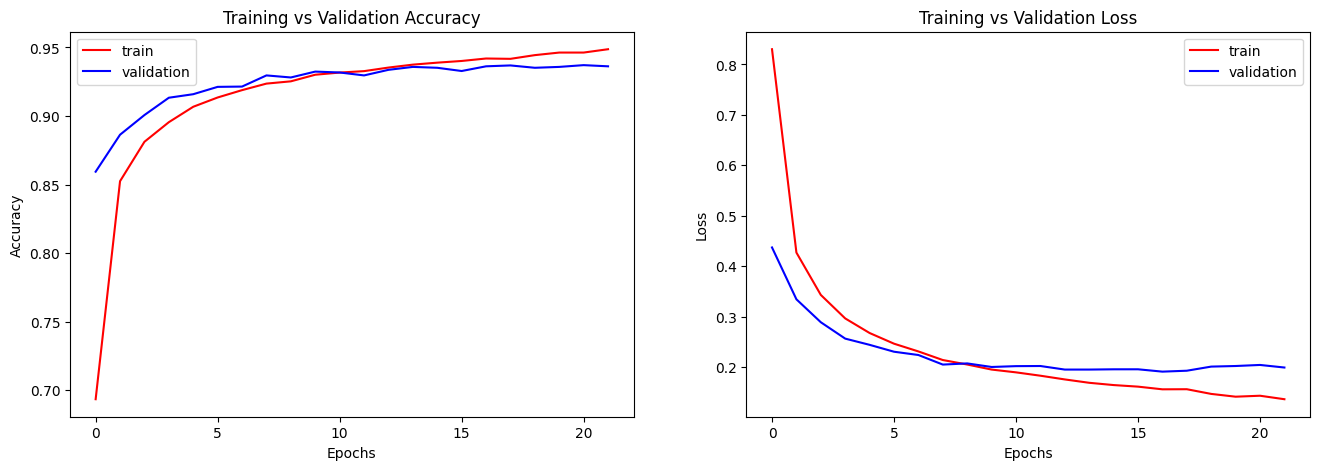

146/146 [==============================] - 2s 12ms/step - loss: 0.1909 - accuracy: 0.9362
Hyperparameter: 0.2
loss: 0.19092611968517303 | accuracy: 93.62157583236694
146/146 [==============================] - 3s 15ms/step
[[736   0  21   0   0   1]
 [  0 732  37   0   2   0]
 [  1   4 780   0   6  16]
 [  1   0   8 784   0   1]
 [  0   0  39   0 704   2]
 [  1   0 144   3  11 638]]
              precision    recall  f1-score   support

           0     0.9959    0.9710    0.9833       758
           1     0.9946    0.9494    0.9715       771
           2     0.7580    0.9665    0.8497       807
           3     0.9962    0.9874    0.9918       794
           4     0.9737    0.9450    0.9591       745
           5     0.9696    0.8005    0.8770       797

    accuracy                         0.9362      4672
   macro avg     0.9480    0.9366    0.9387      4672
weighted avg     0.9466    0.9362    0.9377      4672

Model: "sequential_17"
_________________________________________________

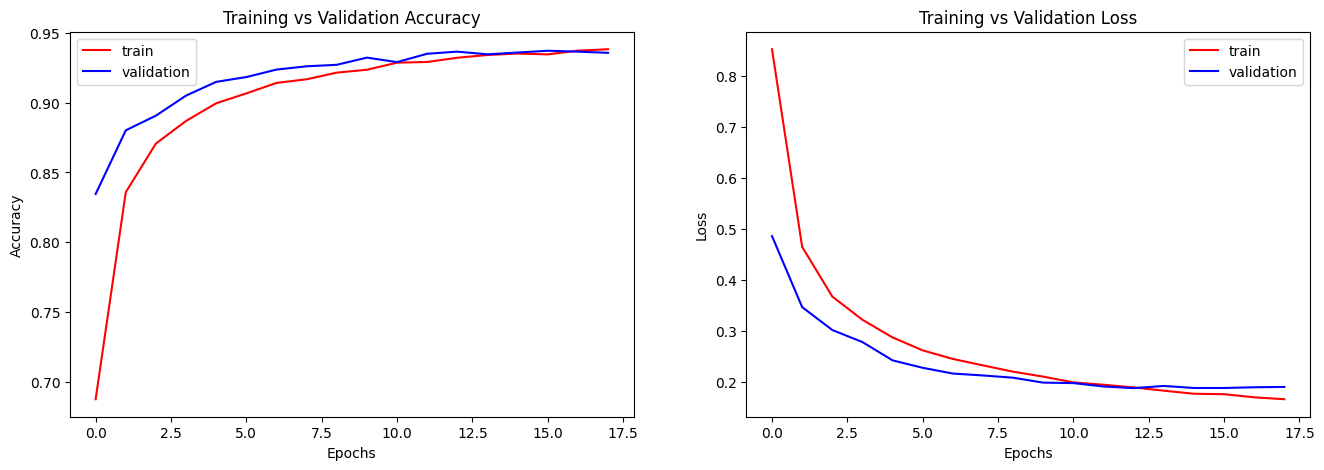

146/146 [==============================] - 2s 12ms/step - loss: 0.1884 - accuracy: 0.9364
Hyperparameter: 0.3
loss: 0.18837161362171173 | accuracy: 93.64297986030579
146/146 [==============================] - 2s 11ms/step
[[735   0  22   0   0   1]
 [  0 726  40   0   2   3]
 [  1   1 784   0  11  10]
 [  0   0  10 783   0   1]
 [  0   0  23   0 715   7]
 [  2   1 145   2  15 632]]
              precision    recall  f1-score   support

           0     0.9959    0.9697    0.9826       758
           1     0.9973    0.9416    0.9686       771
           2     0.7656    0.9715    0.8564       807
           3     0.9975    0.9861    0.9918       794
           4     0.9623    0.9597    0.9610       745
           5     0.9664    0.7930    0.8711       797

    accuracy                         0.9364      4672
   macro avg     0.9475    0.9369    0.9386      4672
weighted avg     0.9462    0.9364    0.9376      4672

Model: "sequential_18"
_________________________________________________

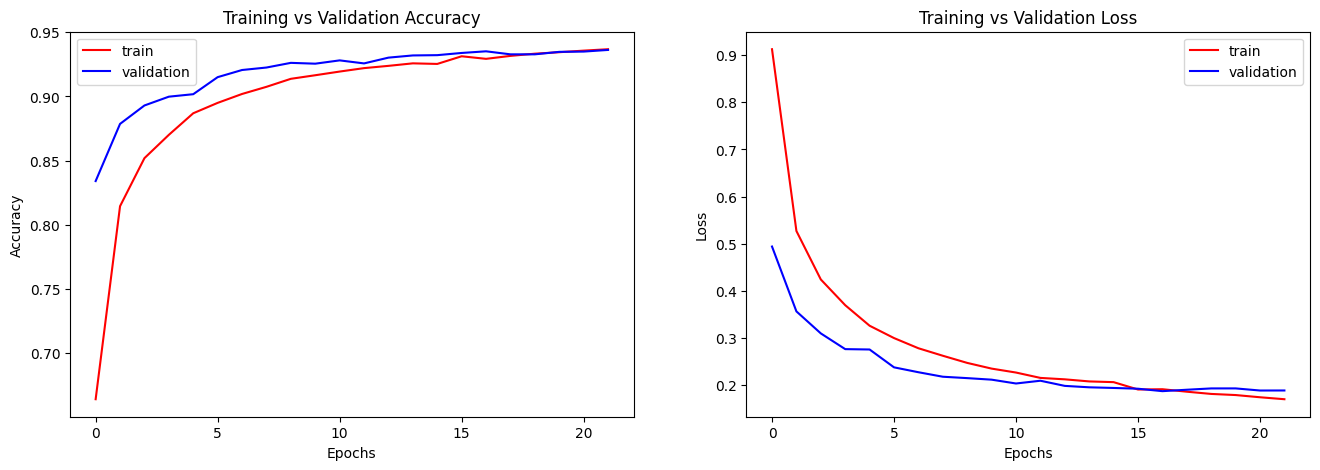

146/146 [==============================] - 4s 13ms/step - loss: 0.1872 - accuracy: 0.9351
Hyperparameter: 0.4
loss: 0.1871761530637741 | accuracy: 93.51455569267273
146/146 [==============================] - 2s 11ms/step
[[736   0  20   0   1   1]
 [  0 731  37   0   2   1]
 [  4   0 766   1  10  26]
 [  0   0   8 785   0   1]
 [  0   0  25   0 711   9]
 [  1   1 134   2  19 640]]
              precision    recall  f1-score   support

           0     0.9933    0.9710    0.9820       758
           1     0.9986    0.9481    0.9727       771
           2     0.7737    0.9492    0.8525       807
           3     0.9962    0.9887    0.9924       794
           4     0.9569    0.9544    0.9556       745
           5     0.9440    0.8030    0.8678       797

    accuracy                         0.9351      4672
   macro avg     0.9438    0.9357    0.9372      4672
weighted avg     0.9425    0.9351    0.9362      4672

Model: "sequential_19"
__________________________________________________

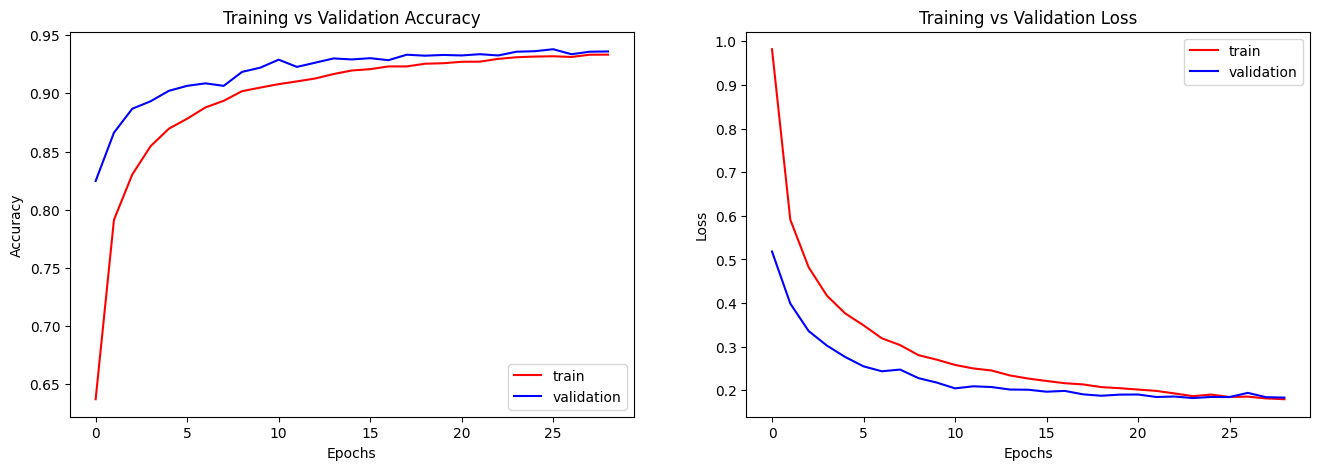

146/146 [==============================] - 3s 13ms/step - loss: 0.1822 - accuracy: 0.9358
Hyperparameter: 0.5
loss: 0.1822318434715271 | accuracy: 93.57876777648926
146/146 [==============================] - 3s 16ms/step
[[732   0  25   0   0   1]
 [  0 732  36   0   3   0]
 [  2   1 782   1  13   8]
 [  0   0   9 784   0   1]
 [  0   0  29   0 714   2]
 [  1   1 145   1  21 628]]
              precision    recall  f1-score   support

           0     0.9959    0.9657    0.9806       758
           1     0.9973    0.9494    0.9728       771
           2     0.7622    0.9690    0.8532       807
           3     0.9975    0.9874    0.9924       794
           4     0.9507    0.9584    0.9545       745
           5     0.9812    0.7880    0.8740       797

    accuracy                         0.9358      4672
   macro avg     0.9475    0.9363    0.9379      4672
weighted avg     0.9463    0.9358    0.9370      4672



In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X_train, X_val, y_train, y_val are defined

do = [0.1, 0.2, 0.3, 0.4, 0.5]
hasil_loss = []
hasil_akurasi = []
hasil_fone = []

for i in do:
    score_loss = []
    score_akurasi = []
    score_fone = []

    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                    weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(LSTM(64, dropout=i)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(i))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',  # Change the loss function
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    es = EarlyStopping(restore_best_weights=True, monitor='val_loss', mode='min', verbose=1, patience=5)
    print(model.summary())

    # Use integer-encoded labels directly
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_val, y_val), callbacks=[es])

    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], color='red')
    plt.plot(history.history['val_accuracy'], color='blue')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend(['train', 'validation'], loc='best')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], color='red')
    plt.plot(history.history['val_loss'], color='blue')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend(['train', 'validation'])
    plt.show()

    score = model.evaluate(X_val, y_val, verbose=1)
    print('Hyperparameter: ' + str(i))
    print(str(model.metrics_names[0]) + ": " + str(score[0]) + " | " + str(model.metrics_names[1]) + ": " + str(score[1] * 100))

    y_pred = model.predict(X_val)
    y_pred = y_pred.argmax(axis=1)
    cm = confusion_matrix(y_val, y_pred)  # No need to use .argmax(axis=1) for y_val
    print(cm)
    print(classification_report(y_val, y_pred, digits=4, output_dict=False))
    report = classification_report(y_val, y_pred, digits=4, output_dict=False)


## Batch Size

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, None, 300)         2846100   
                                                                 
 bidirectional_20 (Bidirect  (None, 128)               186880    
 ional)                                                          
                                                                 
 dense_40 (Dense)            (None, 128)               16512     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_41 (Dense)            (None, 6)                 774       
                                                                 
Total params: 3050266 (11.64 MB)
Trainable params: 204166 (797.52 KB)
Non-trainable params: 2846100 (10.86 MB)
________

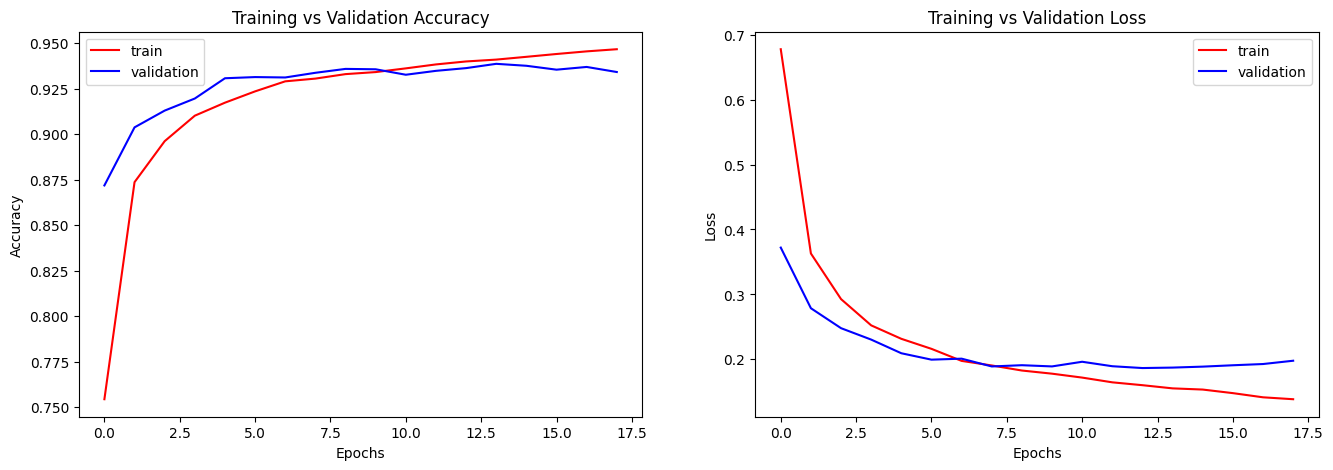

146/146 [==============================] - 2s 12ms/step - loss: 0.1866 - accuracy: 0.9362
Hyperparameter: 16
loss: 0.18664613366127014 | accuracy: 93.62157583236694
146/146 [==============================] - 2s 11ms/step
[[732   0  23   0   0   3]
 [  0 725  41   0   2   3]
 [  3   0 775   0   6  23]
 [  0   0  10 783   0   1]
 [  0   0  26   0 713   6]
 [  2   0 140   1   8 646]]
              precision    recall  f1-score   support

           0     0.9932    0.9657    0.9793       758
           1     1.0000    0.9403    0.9693       771
           2     0.7635    0.9603    0.8507       807
           3     0.9987    0.9861    0.9924       794
           4     0.9781    0.9570    0.9674       745
           5     0.9472    0.8105    0.8736       797

    accuracy                         0.9362      4672
   macro avg     0.9468    0.9367    0.9388      4672
weighted avg     0.9453    0.9362    0.9377      4672

Model: "sequential_21"
__________________________________________________

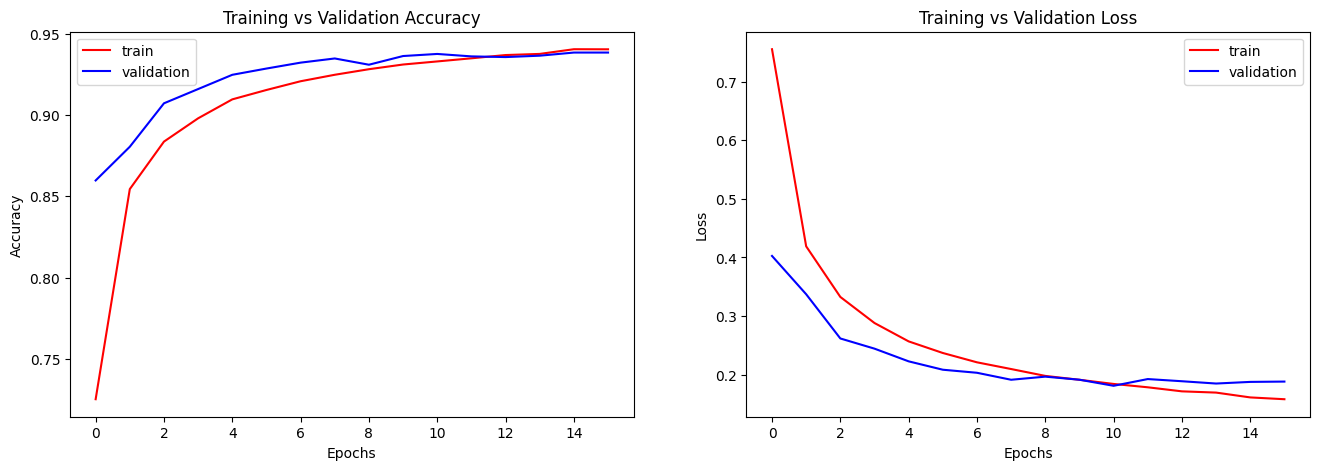

146/146 [==============================] - 2s 12ms/step - loss: 0.1810 - accuracy: 0.9377
Hyperparameter: 32
loss: 0.18104994297027588 | accuracy: 93.77140402793884
146/146 [==============================] - 3s 12ms/step
[[734   0  22   0   0   2]
 [  0 734  34   0   2   1]
 [  0   3 772   0  14  18]
 [  0   0   7 786   0   1]
 [  0   0  23   0 717   5]
 [  2   1 142   1  13 638]]
              precision    recall  f1-score   support

           0     0.9973    0.9683    0.9826       758
           1     0.9946    0.9520    0.9728       771
           2     0.7720    0.9566    0.8545       807
           3     0.9987    0.9899    0.9943       794
           4     0.9611    0.9624    0.9618       745
           5     0.9594    0.8005    0.8728       797

    accuracy                         0.9377      4672
   macro avg     0.9472    0.9383    0.9398      4672
weighted avg     0.9459    0.9377    0.9388      4672

Model: "sequential_22"
__________________________________________________

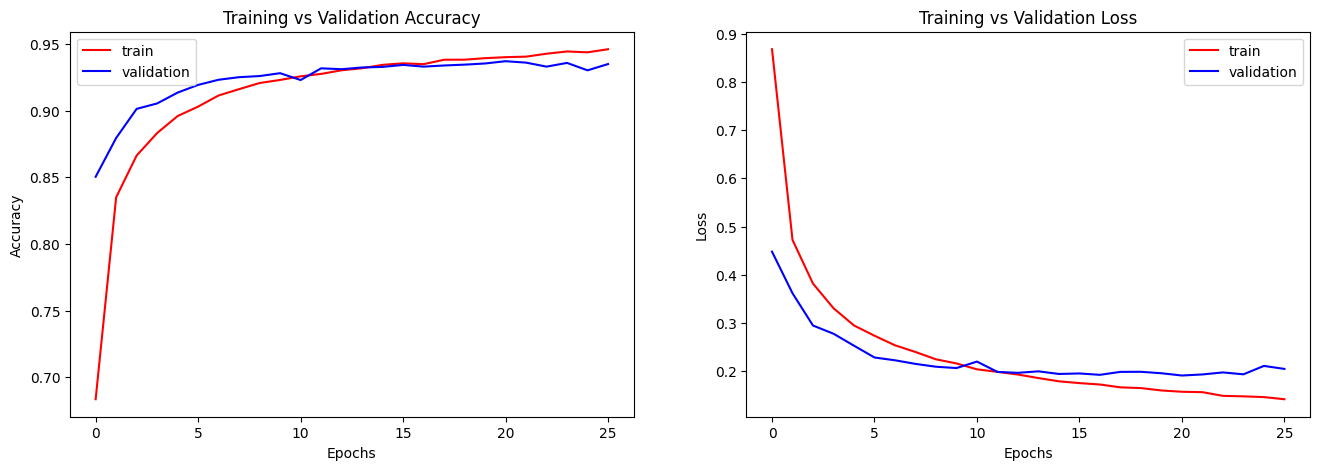

146/146 [==============================] - 3s 13ms/step - loss: 0.1912 - accuracy: 0.9371
Hyperparameter: 64
loss: 0.1911887228488922 | accuracy: 93.70719194412231
146/146 [==============================] - 2s 11ms/step
[[740   0  16   0   0   2]
 [  0 731  35   0   2   3]
 [  8   6 761   2   5  25]
 [  1   0   8 784   0   1]
 [  0   0  25   0 714   6]
 [  1   1 134   2  11 648]]
              precision    recall  f1-score   support

           0     0.9867    0.9763    0.9814       758
           1     0.9905    0.9481    0.9689       771
           2     0.7773    0.9430    0.8522       807
           3     0.9949    0.9874    0.9912       794
           4     0.9754    0.9584    0.9668       745
           5     0.9460    0.8130    0.8745       797

    accuracy                         0.9371      4672
   macro avg     0.9451    0.9377    0.9392      4672
weighted avg     0.9438    0.9371    0.9381      4672

Model: "sequential_23"
___________________________________________________

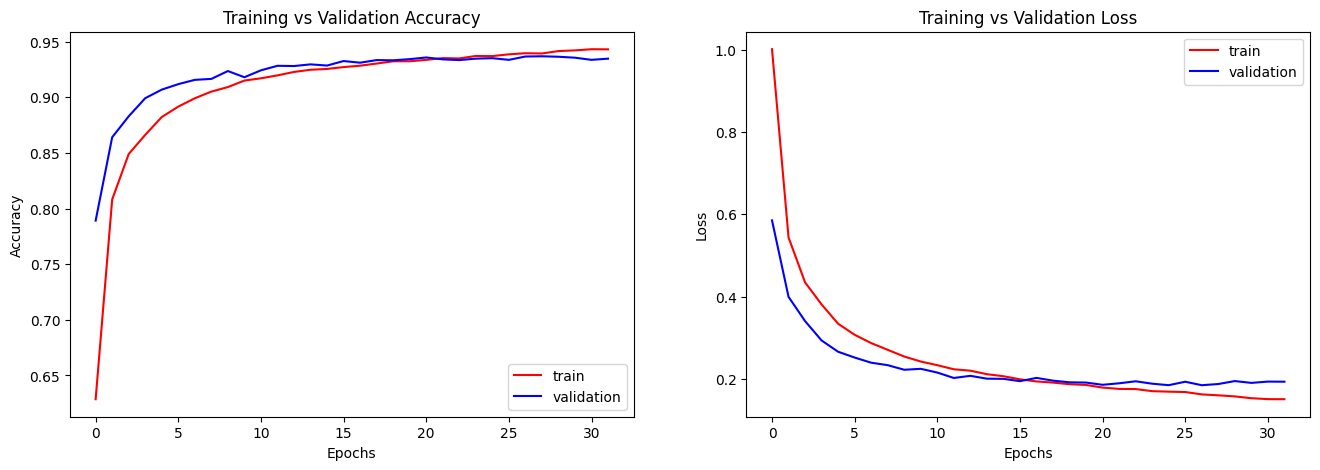

146/146 [==============================] - 2s 16ms/step - loss: 0.1849 - accuracy: 0.9366
Hyperparameter: 128
loss: 0.1849108338356018 | accuracy: 93.66438388824463
146/146 [==============================] - 2s 11ms/step
[[736   0  21   0   0   1]
 [  0 733  35   0   2   1]
 [  4   5 767   1   8  22]
 [  0   0   8 786   0   0]
 [  0   1  27   0 712   5]
 [  1   0 140   2  12 642]]
              precision    recall  f1-score   support

           0     0.9933    0.9710    0.9820       758
           1     0.9919    0.9507    0.9709       771
           2     0.7685    0.9504    0.8499       807
           3     0.9962    0.9899    0.9931       794
           4     0.9700    0.9557    0.9628       745
           5     0.9568    0.8055    0.8747       797

    accuracy                         0.9366      4672
   macro avg     0.9461    0.9372    0.9389      4672
weighted avg     0.9448    0.9366    0.9378      4672

Model: "sequential_24"
__________________________________________________

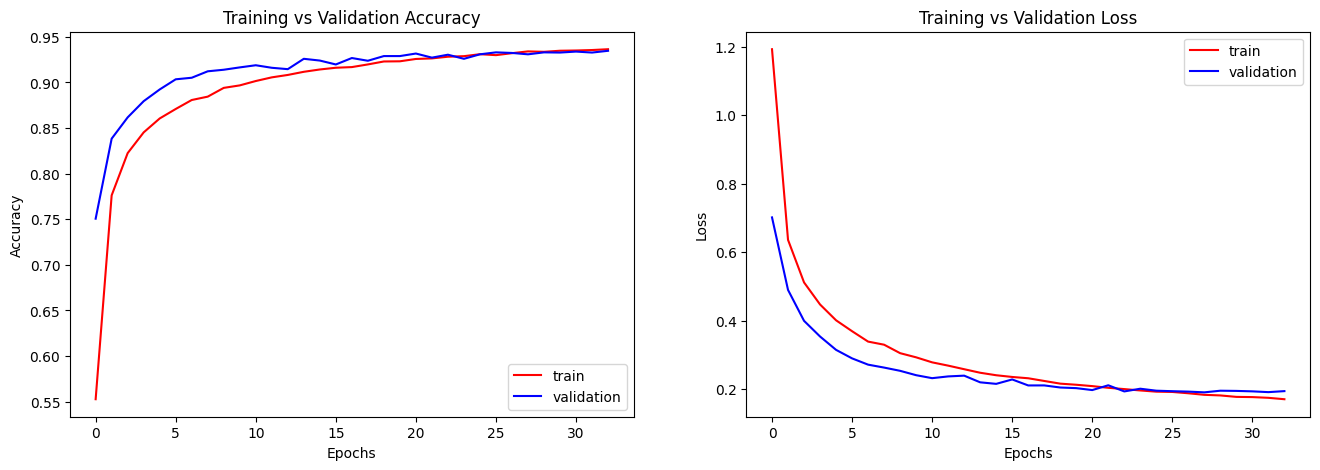

146/146 [==============================] - 2s 13ms/step - loss: 0.1912 - accuracy: 0.9309
Hyperparameter: 256
loss: 0.19124527275562286 | accuracy: 93.08647513389587
146/146 [==============================] - 3s 14ms/step
[[737   0  19   0   0   2]
 [  0 730  38   0   2   1]
 [  6   1 744   0  11  45]
 [  1   0   6 785   0   2]
 [  1   0  30   0 709   5]
 [  6   0 129   3  15 644]]
              precision    recall  f1-score   support

           0     0.9814    0.9723    0.9768       758
           1     0.9986    0.9468    0.9720       771
           2     0.7702    0.9219    0.8393       807
           3     0.9962    0.9887    0.9924       794
           4     0.9620    0.9517    0.9568       745
           5     0.9213    0.8080    0.8610       797

    accuracy                         0.9309      4672
   macro avg     0.9383    0.9316    0.9330      4672
weighted avg     0.9369    0.9309    0.9320      4672



In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X_train, X_val, y_train, y_val are defined

bs = [16, 32, 64, 128, 256]
hasil_loss = []
hasil_akurasi = []
hasil_fone = []

for i in bs:
    score_loss = []
    score_akurasi = []
    score_fone = []

    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                        weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(LSTM(64, dropout=0.3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',  # Change the loss function
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    es = EarlyStopping(restore_best_weights=True, monitor='val_loss', mode='min', verbose=1, patience=5)
    print(model.summary())

    # Use integer-encoded labels directly
    history = model.fit(X_train, y_train, epochs=100, batch_size=i, verbose=1, validation_data=(X_val, y_val), callbacks=[es])

    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], color='red')
    plt.plot(history.history['val_accuracy'], color='blue')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend(['train', 'validation'], loc='best')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], color='red')
    plt.plot(history.history['val_loss'], color='blue')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend(['train', 'validation'])
    plt.show()

    score = model.evaluate(X_val, y_val, verbose=1)
    print('Hyperparameter: ' + str(i))
    print(str(model.metrics_names[0]) + ": " + str(score[0]) + " | " + str(model.metrics_names[1]) + ": " + str(score[1] * 100))

    y_pred = model.predict(X_val)
    y_pred = y_pred.argmax(axis=1)
    cm = confusion_matrix(y_val, y_pred)
    print(cm)
    print(classification_report(y_val, y_pred, digits=4, output_dict=False))
    report = classification_report(y_val, y_pred, digits=4, output_dict=False)


## Learning Rate

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, None, 300)         2846100   
                                                                 
 bidirectional_25 (Bidirect  (None, 128)               186880    
 ional)                                                          
                                                                 
 dense_50 (Dense)            (None, 128)               16512     
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 6)                 774       
                                                                 
Total params: 3050266 (11.64 MB)
Trainable params: 204166 (797.52 KB)
Non-trainable params: 2846100 (10.86 MB)
________

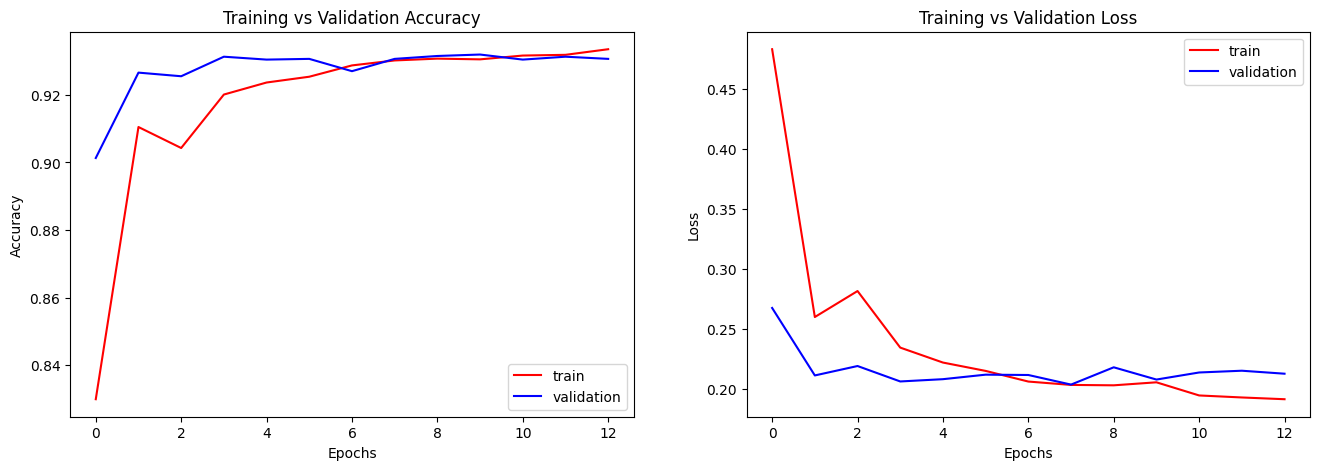

146/146 [==============================] - 2s 11ms/step - loss: 0.2040 - accuracy: 0.9307
Hyperparameter: 0.01
loss: 0.20397581160068512 | accuracy: 93.06507110595703
146/146 [==============================] - 2s 11ms/step
[[735   0  19   0   0   4]
 [  0 731  36   0   2   2]
 [  4   5 761   0  12  25]
 [  0   0  10 782   1   1]
 [  0   0  24   0 714   7]
 [  4   2 149   0  17 625]]
              precision    recall  f1-score   support

           0     0.9892    0.9697    0.9793       758
           1     0.9905    0.9481    0.9689       771
           2     0.7618    0.9430    0.8427       807
           3     1.0000    0.9849    0.9924       794
           4     0.9571    0.9584    0.9577       745
           5     0.9413    0.7842    0.8556       797

    accuracy                         0.9307      4672
   macro avg     0.9400    0.9314    0.9328      4672
weighted avg     0.9387    0.9307    0.9317      4672

Model: "sequential_26"
________________________________________________

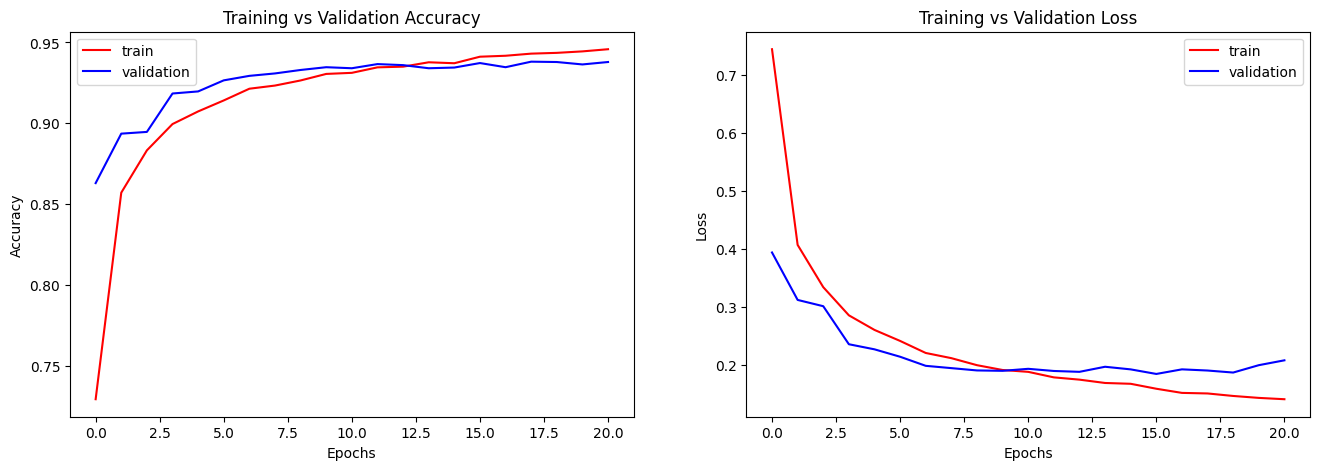

146/146 [==============================] - 2s 17ms/step - loss: 0.1843 - accuracy: 0.9373
Hyperparameter: 0.001
loss: 0.18425515294075012 | accuracy: 93.72859597206116
146/146 [==============================] - 2s 11ms/step
[[740   0  17   0   0   1]
 [  0 730  38   0   2   1]
 [  6   3 774   3   8  13]
 [  1   0   5 787   0   1]
 [  0   0  22   0 719   4]
 [  2   0 147   3  16 629]]
              precision    recall  f1-score   support

           0     0.9880    0.9763    0.9821       758
           1     0.9959    0.9468    0.9707       771
           2     0.7717    0.9591    0.8552       807
           3     0.9924    0.9912    0.9918       794
           4     0.9651    0.9651    0.9651       745
           5     0.9692    0.7892    0.8700       797

    accuracy                         0.9373      4672
   macro avg     0.9470    0.9379    0.9392      4672
weighted avg     0.9458    0.9373    0.9381      4672

Model: "sequential_27"
_______________________________________________

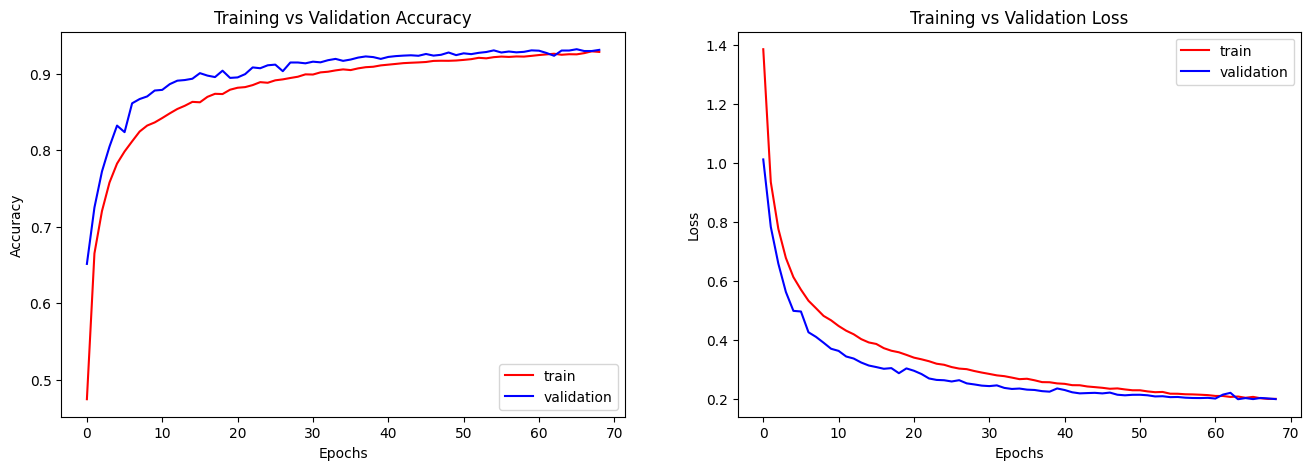

146/146 [==============================] - 2s 12ms/step - loss: 0.2002 - accuracy: 0.9300
Hyperparameter: 0.0001
loss: 0.20022501051425934 | accuracy: 93.0008590221405
146/146 [==============================] - 2s 11ms/step
[[731   0  26   0   0   1]
 [  0 725  41   0   2   3]
 [  1   0 788   0   9   9]
 [  0   0   9 784   0   1]
 [  0   0  35   0 708   2]
 [  4   1 155   3  25 609]]
              precision    recall  f1-score   support

           0     0.9932    0.9644    0.9786       758
           1     0.9986    0.9403    0.9686       771
           2     0.7476    0.9765    0.8469       807
           3     0.9962    0.9874    0.9918       794
           4     0.9516    0.9503    0.9510       745
           5     0.9744    0.7641    0.8565       797

    accuracy                         0.9300      4672
   macro avg     0.9436    0.9305    0.9322      4672
weighted avg     0.9423    0.9300    0.9312      4672



In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X_train, X_val, y_train, y_val are defined

lr = [0.01, 0.001, 0.0001]
hasil_loss = []
hasil_akurasi = []
hasil_fone = []

for i in lr:
    score_loss = []
    score_akurasi = []
    score_fone = []

    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                    weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(LSTM(64, dropout=0.3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',  # Change the loss function
                  optimizer=tf.keras.optimizers.Adam(learning_rate=i),
                  metrics=['accuracy'])

    es = EarlyStopping(restore_best_weights=True, monitor='val_loss', mode='min', verbose=1, patience=5)
    print(model.summary())

    # Use integer-encoded labels directly
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_val, y_val), callbacks=[es])

    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], color='red')
    plt.plot(history.history['val_accuracy'], color='blue')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend(['train', 'validation'], loc='best')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], color='red')
    plt.plot(history.history['val_loss'], color='blue')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend(['train', 'validation'])
    plt.show()

    score = model.evaluate(X_val, y_val, verbose=1)
    print('Hyperparameter: ' + str(i))
    print(str(model.metrics_names[0]) + ": " + str(score[0]) + " | " + str(model.metrics_names[1]) + ": " + str(score[1] * 100))

    y_pred = model.predict(X_val)
    y_pred = y_pred.argmax(axis=1)
    cm = confusion_matrix(y_val, y_pred)  # No need to use .argmax(axis=1) for y_val
    print(cm)
    print(classification_report(y_val, y_pred, digits=4, output_dict=False))
    report = classification_report(y_val, y_pred, digits=4, output_dict=False)


# BiLSTM

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, None, 300)         2846100   
                                                                 
 bidirectional_28 (Bidirect  (None, 128)               186880    
 ional)                                                          
                                                                 
 dense_56 (Dense)            (None, 128)               16512     
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_57 (Dense)            (None, 6)                 774       
                                                                 
Total params: 3050266 (11.64 MB)
Trainable params: 204166 (797.52 KB)
Non-trainable params: 2846100 (10.86 MB)
________

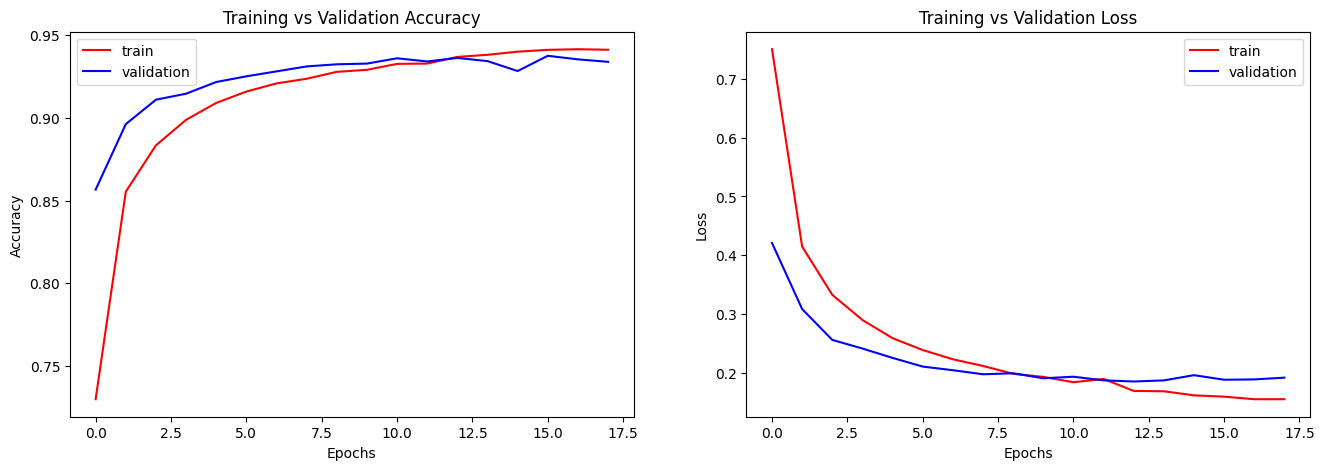

146/146 [==============================] - 2s 12ms/step - loss: 0.1883 - accuracy: 0.9351
Test Set Evaluation:
loss: 0.18828298151493073 | accuracy: 93.51455569267273
146/146 [==============================] - 3s 12ms/step
Confusion Matrix:
[[772   0  21   0   4   0]
 [  0 744  20   0   2   0]
 [  4   9 711   0  15   7]
 [  1   0   6 803   1   0]
 [  0   0  20   0 742   0]
 [  6   2 163   2  20 597]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9860    0.9686    0.9772       797
           1     0.9854    0.9713    0.9783       766
           2     0.7556    0.9531    0.8429       746
           3     0.9975    0.9901    0.9938       811
           4     0.9464    0.9738    0.9599       762
           5     0.9884    0.7557    0.8565       790

    accuracy                         0.9351      4672
   macro avg     0.9432    0.9354    0.9348      4672
weighted avg     0.9451    0.9351    0.9356      4672



In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X_train, X_val, y_train, y_val are defined

hasil_loss = []
hasil_akurasi = []
hasil_fone = []
score_loss = []
score_akurasi = []
score_fone = []

model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(64, dropout=0.3)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

es = EarlyStopping(restore_best_weights=True, monitor='val_loss', mode='min', verbose=1, patience=5)
print(model.summary())

# Use integer-encoded labels directly
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_val, y_val), callbacks=[es])

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(['train', 'validation'], loc='best')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(['train', 'validation'])
plt.show()

score = model.evaluate(X_test, y_test, verbose=1)
print('Test Set Evaluation:')
print(str(model.metrics_names[0]) + ": " + str(score[0]) + " | " + str(model.metrics_names[1]) + ": " + str(score[1] * 100))

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(classification_report(y_test, y_pred, digits=4, output_dict=False))


In [ ]:
# Misalnya, jika Anda menggunakan TensorFlow
from tensorflow.keras.models import load_model

# Simpan model ke lokasi tertentu
model.save("/content/drive/MyDrive/SKRIPSI/Data/modelBiLSTMFix.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Membuat prediksi dengan model
emotions = ['takut', 'jijik', 'marah', 'terkejut', 'bahagia', 'sedih']

In [ ]:
# Masukkan teks yang ingin Anda prediksi
input_text = "wow hari ini kaget banget tiba tiba dapet kuota gratis"

# Tokenisasi dan praproses input teks
input_sequence = tokenizer.texts_to_sequences([input_text])
input_sequence = pad_sequences(input_sequence, maxlen=max_seq_length)

# Lakukan prediksi
predicted_probabilities = model.predict(input_sequence)

# Dapatkan kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predicted_probabilities)

# Emosi yang sesuai dengan kelas prediksi
predicted_emotion = emotions[predicted_class]

# Cetak hasil prediksi
print(f"Input Text: {input_text}")
print(f"Predicted Emotion: {predicted_emotion}")

1/1 [==============================] - 1s 1s/step
Input Text: wow hari ini kaget banget tiba tiba dapet kuota gratis
Predicted Emotion: terkejut


In [ ]:
# Masukkan teks yang ingin Anda prediksi
input_text = "anjir jelek banget sinyal telkomsel"

# Tokenisasi dan praproses input teks
input_sequence = tokenizer.texts_to_sequences([input_text])
input_sequence = pad_sequences(input_sequence, maxlen=max_seq_length)

# Lakukan prediksi
predicted_probabilities = model.predict(input_sequence)

# Dapatkan kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predicted_probabilities)

# Emosi yang sesuai dengan kelas prediksi
predicted_emotion = emotions[predicted_class]

# Cetak hasil prediksi
print(f"Input Text: {input_text}")
print(f"Predicted Emotion: {predicted_emotion}")

1/1 [==============================] - 0s 38ms/step
Input Text: anjir jelek banget sinyal telkomsel
Predicted Emotion: marah
